<p> <img src="https://servicos.nc.ufpr.br/PortalNC/painel/assets/img/logos/logo_ufpr.jpg" width="250" height="250" align="right">
UNIVERSIDADE FEDERAL DO PARANÁ <br>
CE329 - APRENDIZAGEM DE MAQUINA <br>
Profº: Eduardo Vargas Ferreira <br>
Alunos:  GRR20233876 – Leonardo Gonçalves Fischer <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;GRR20233881 – Raymundo Eduardo Pilz <br>
</p>

# ANÁLISE DE CHURN EM UMA INSTITUIÇÃO FINANCEIRA

## PROBLEMÁTICA:
O problema a ser abordado neste trabalho é a taxa de churn em uma instituição financeira. A taxa 
de churn, que se refere à perda de clientes ao longo do tempo, é uma métrica crítica para empresas 
de serviços financeiros, pois afeta diretamente a receita e a satisfação do cliente. O objetivo deste 
estudo é analisar e compreender os fatores que podem estar contribuindo para o churn de clientes 
e identificar estratégias para reduzi-lo.
### DESCRIÇÃO DO PROBLEMA:
Conhecer a taxa de churn de qualquer instituição é importante visto que para a empresa custa muito 
mais captar um novo cliente do que manter um que já possui.
Compreender esses fatores é fundamental para tomar decisões informadas que permite a 
companhia desenvolver programas de leadade e implementar estratégias que aumentem a retenção 
de clientes.
## OBJETIVOS:
* Análise exploratória e descritiva dos principais indicadores e características dos clientes, tais 
como:
    * Pontuação de crédito;
    * Localização;
    * Gênero;
    * Idade;
    * Tempo de permanência;
    * Saldo da conta;
    * Número de produtos;
    * Uso de cartão de crédito
    * Atividade de conta;
    * Salário estimado;
    * Churn;
    * Reclamações realizadas pelo cliente;
    * Índice de satisfação do cliente;
    * Tipo de cartão;
    * Pontos Acumulados.
* Identificação e correção de possíveis inconsistências nos dados fornecidos;
* Identificar quais dessas características têm maior correlação com o churn de clientes;
* Modelos de predições dos dados para explorar padrões e tendências nos dados relacionados 
ao churn;
* Comparações com modelos com todos os resultados gerados;
* Propor recomendações estratégicas com base nos insights obtidos para reduzir a taxa de churn.

## dataset disponivel em: 
https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

# 1. Importando biblioteca

Nesta seção, serão organizado todas as bibliotecas que serão utilizadas no projeto. O objetivo é manter estruturado as biblioteca armazenadas nesta seção para sua melhor visualização.

In [1]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import math

from tabulate import tabulate

# 2. ELT (Extração, Limpeza e Transformação de Dados)

Inicialmente será carregado o conjunto de dados extraído do Kaggle, prepará-lo e transformá-lo para que os dados se tornem informações valiosas e possam ser usados efetivamente em nossa análise.

## 2.1 Carregamento dos Dados

Primeiramente, realizaremos o carregamento do conjunto de dados e uma visualização inicial dos dados carregados.

In [2]:
## Carregando os dados

data = pd.read_csv('dataset\\Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# Verificando o volume de dados do dataset
shape = data.shape
print("Observa-se que o conjunto de dados possui {} linhas e {} colunas.".format(shape[0], shape[1]))

Observa-se que o conjunto de dados possui 10000 linhas e 18 colunas.


## 2.2 Verificação de Dados Faltantes

Agora, realizaremos a verificação das colunas que contêm dados faltantes em nosso conjunto de dados. A identificação de variáveis com valores ausentes é fundamental, pois isso pode impactar nossa análise e determinar a necessidade de tratamento dos dados.

In [4]:
# Verificando colunas com dados faltantes
data_na = data.isnull().sum()
cols_na = data_na[data_na > 0]

if cols_na.empty:
    print("Nenhuma coluna possui dados ausentes.")
else:
    print(f"{len(cols_na)} coluna(s) possui(em) dados ausentes.")
    print("Colunas com dados ausentes:")
    for col, missing_count in cols_na.items():
        print(f"{col}: {missing_count} valor(es) ausente(s)")


Nenhuma coluna possui dados ausentes.


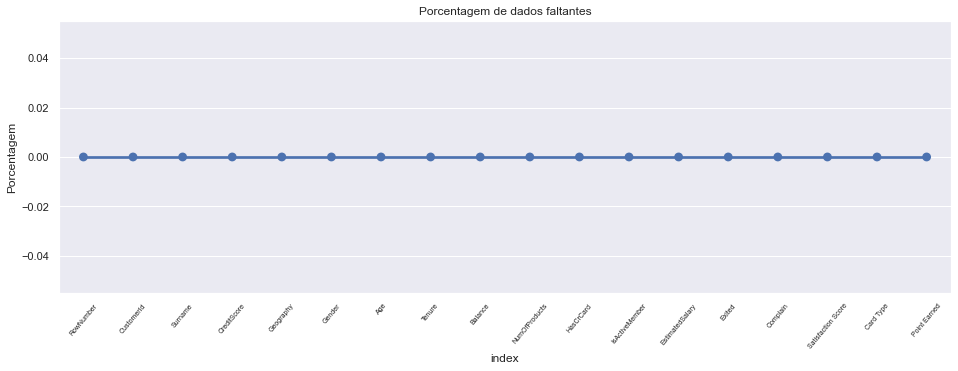

In [5]:
# Representação gráfica
# Verificando colunas com dados faltantes
data_na = pd.DataFrame((data.isnull().sum() * 100 / data.shape[0])).reset_index()

# Gráfico
plt.figure (figsize = (16,5))
ax = sns.pointplot(x='index', y=0, data=data_na)
plt.xticks(rotation = 50,fontsize = 7)
plt.title("Porcentagem de dados faltantes")
plt.ylabel("Porcentagem")
plt.show()

## 2.3 Verificação e Exclusão de Dados Duplicadas
Nesta etapa, realizaremos a verificação de dados duplicados. Embora seja improvável que tenhamos dados duplicados neste conjunto de dados, é uma etapa importante para garantir a integridade de nossa análise. Vamos verificar e, se necessário, remover qualquer entrada duplicada.

Para evitar interferências na detecção de dados duplicados, também excluiremos a coluna "RowNumber" de nosso conjunto de dados, pois esta coluna parece ser uma numeração automática das linhas.

In [6]:
# Eliminando a coluna RowNumber
data = data.drop(['RowNumber'], axis=1)

In [7]:
# Verificando linhas duplicadas
rows_data = data[data.duplicated()]

if rows_data.empty:
    print("Nenhum dado duplicado foi encontrado no conjunto de dados.")
else:
    print(f"Foram encontradas {len(rows_data)} entradas duplicadas.")   
        

Nenhum dado duplicado foi encontrado no conjunto de dados.


In [8]:
# Caso houvessem linhas duplicadas, seriam excluidas e impresso o novo conjunto de dados
data = data.drop_duplicates()
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 2.4 Renomeando Títulos
Nesta etapa, realizaremos a renomeação dos títulos das colunas para torná-los mais descritivos e facilitar o estudo e a compreensão dos dados.

Isso nos ajudará a trabalhar com os dados de forma mais eficiente e compreensível em etapas posteriores da análise.


In [9]:
# Alterando nome das Colunas
data = data.rename(columns={"CustomerId": "ID",
                            "Surname": "Sobrenome",
                            "CreditScore": "PontuacaoCredito", 
                            "Geography": "Localizacao", 
                            "Gender": "Genero",
                            "Age": "Idade",
                            "Tenure": "TempoPermanencia",
                            "Balance": "Saldo",
                            "NumOfProducts": "Produtos",
                            "HasCrCard": "TemCartaoCredito",
                            "IsActiveMember": "MembroAtivo",
                            "EstimatedSalary": "SalarioEstimado",
                            "Exited": "Churn",
                            "Complain": "Reclamacoes",
                            "Satisfaction Score": "IndiceSatisfacao",
                            "Card Type": "TipoCartao",
                            "Point Earned": "PontosAcumulados"})
data.head()

,ID,Sobrenome,PontuacaoCredito,Localizacao,Genero,Idade,TempoPermanencia,Saldo,Produtos,TemCartaoCredito,MembroAtivo,SalarioEstimado,Churn,Reclamacoes,IndiceSatisfacao,TipoCartao,PontosAcumulados
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 2.5 Exclusão de Colunas Desnecessárias

Nesta etapa, procederemos com a exclusão de colunas que são consideradas desnecessárias para nossa análise. A exclusão de colunas que não são relevantes ou não contribuem para nossos objetivos pode simplificar o conjunto de dados e tornar nossa análise mais eficiente.

Após a exclusão, atualizaremos o conjunto de dados resultante para refletir a nova estrutura.

Inicialmente, serão excluídas as colunas **ID** e **Sobrenome**, uma vez que são dados de informação interno da instituição não impactando na nossa análise.

In [10]:
# Excluindo colunas desnecessarias (Importante que este processo seja executado depois de exclusão de linhas duplicadas, uma vez que pode ter cliente com perfis semelhantes evitando que esses dados sejam suprimidos)
data = data.drop(['ID', 
                  'Sobrenome'],
                 axis=1)
data.head()

,PontuacaoCredito,Localizacao,Genero,Idade,TempoPermanencia,Saldo,Produtos,TemCartaoCredito,MembroAtivo,SalarioEstimado,Churn,Reclamacoes,IndiceSatisfacao,TipoCartao,PontosAcumulados
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 2.6 Informações Gerais do Conjunto de Dados

Nesta etapa, exploraremos informações gerais sobre o conjunto de dados para compreender sua estrutura e características. Isso nos ajudará a ter uma visão inicial dos dados com os quais estamos trabalhando.

In [11]:
# Obter informações gerais do conjunto de dados
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PontuacaoCredito  10000 non-null  int64  
 1   Localizacao       10000 non-null  object 
 2   Genero            10000 non-null  object 
 3   Idade             10000 non-null  int64  
 4   TempoPermanencia  10000 non-null  int64  
 5   Saldo             10000 non-null  float64
 6   Produtos          10000 non-null  int64  
 7   TemCartaoCredito  10000 non-null  int64  
 8   MembroAtivo       10000 non-null  int64  
 9   SalarioEstimado   10000 non-null  float64
 10  Churn             10000 non-null  int64  
 11  Reclamacoes       10000 non-null  int64  
 12  IndiceSatisfacao  10000 non-null  int64  
 13  TipoCartao        10000 non-null  object 
 14  PontosAcumulados  10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.2+ MB


É possível destacar que, após os tratamentos iniciais dos dados, o conjunto de dados apresentam variáveis categóricas e numéricas. É importante destacar que esses tratamentos foram preliminares e, à medida do avanço e aprofundamento de nossa análise, novas modificações serão implementadas.

# 3. EDA (Análise Exploratória dos Dados)
Após a conclusão do primeiro processo de tratamento e transformação do conjunto de dados, avançaremos para a etapa de Análise Exploratória dos Dados (EDA). Durante esta fase, examinaremos cada variável individualmente para identificar seu valor para o estudo. Além disso, faremos uma análise comparativa entre cada variável e a variável alvo "Churn," que é o foco principal de nosso estudo.

## 3.1 Análise Individual das Variáveis

Começaremos a análise exploratória examinando cada variável separadamente. Isso inclui:

- Cálculo de estatísticas descritivas, como média, mediana e desvio padrão para variáveis numéricas.
- Criação de gráficos e visualizações relevantes para cada tipo de variável.
- Identificação de tendências, padrões ou características únicas em cada variável.
- O comportamento da variável em relação aos clientes que sairam e que não sairam da empresa.

Iniciaremos a nossa análise exploratória conhecendo os dados das variáveis através do resumo fornecido com informações referente a quantidade de dados, média, desvio-padrão, quartis, valores mínimo e máximo, média e mediana. 

In [12]:
# Resumo dos dados do dataset
data.describe()

,PontuacaoCredito,Idade,TempoPermanencia,Saldo,Produtos,TemCartaoCredito,MembroAtivo,SalarioEstimado,Churn,Reclamacoes,IndiceSatisfacao,PontosAcumulados
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


Essas informações iniciais proporcionam uma visão geral do comportamento dos dados em relação às variáveis. É possível notar a presença de outliers em variáveis, como por exemplo **idade** e a existência de variáveis binárias, como **TemCartaoCredito**, **Churn** e **Reclamacoes**. É importante realizar essas observações como ponto de partida para análises mais detalhadas e para entender melhor os padrões e tendências no seu conjunto de dados. 

### 3.1.1 Churn

A variável **CHURN** demonstra os clientes que permaneceram ou deixaram a empresa até a data da coleta de dados. 

Assim sendo, vamos quantificar e visualizar esses dados. 

In [13]:
# Contando a quantidade de clientes
clientes_churn = data['Churn'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
clientes_churn.index = clientes_churn.index.map({0: 'Não', 1: 'Sim'})

# Criando um DataFrame a partir dos valores contados
tb_churn = pd.DataFrame({'Churn': clientes_churn.index, 
                          'Clientes': clientes_churn.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_churn['Clientes'].sum()
linha_total = pd.DataFrame({'Churn': ['Total'], 
                            'Clientes': [total_clientes]})
tb_churn = pd.concat([tb_churn, linha_total], ignore_index=True)

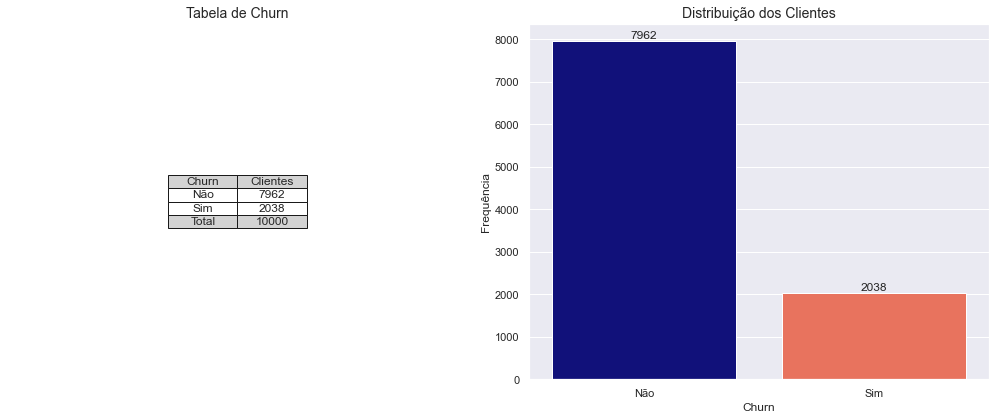

In [14]:
# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotando a tabela tb_churn no primeiro subplot
axes[0].axis('off')  
axes[0].table(cellText=tb_churn.values,
              colLabels=tb_churn.columns,
              cellLoc='center',
              loc='center',
              colColours=['lightgray', 'lightgray'],
              cellColours=[['white', 'white'], 
                           ['white', 'white'], 
                           ['lightgray', 'lightgray']],
              colLoc='center',
              colWidths=[0.15, 0.15])
axes[0].set_title('Tabela de Churn', fontsize=14)

# Gráfico de barras para a distribuição original no segundo subplot
sns.barplot(x=clientes_churn.index, y=clientes_churn.values, palette=['darkblue', 'tomato'], ax=axes[1])
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição dos Clientes', fontsize=14)

# Adicionando os rótulos de dados no gráfico de barras
for index, value in enumerate(clientes_churn.values):
    axes[1].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Na análise da nossa primeira variável, os resultados revelam que, dos 10.000 clientes analisados, 20,38% encerraram a sua relação com a empresa, enquanto a grande maioria, 79,62% dos clientes, permanecem como clientes da instituição. A quantificação desta variável tem por objetivo fornecer uma visão clara da distribuição dos clientes em relação ao churn. No discorrer dos próximos tópicos, sempre será abordado o comportamento desta variável sobre as demais, afim de proporcionar causa e efeito de cada uma sobre uma possível tomada de decisão do cliente para sair da instituição.

### 3.1.2 Pontuação de Crédito

Na variável **PONTUAÇÃO DE CRÉDITO** vamos explorar as distribuição destes dados e como elas estão relacionadas com o **Churn**.

In [15]:
# Resumo dos dados da variável Pontuação de Crédito
data['PontuacaoCredito'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: PontuacaoCredito, dtype: float64

Usaremos um 'histograma' para visualizar a distribuição das pontuações de crédito. Isso nos permitirá entender como as pontuações estão dispersas e identificar padrões na distribuição.

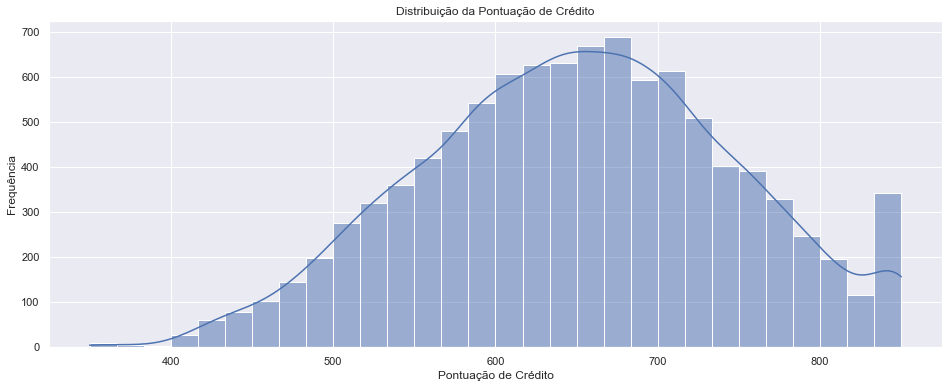

In [16]:
# Histograma para visualizar a distribuição dos dados
plt.figure(figsize=(16, 6))
sns.histplot(data['PontuacaoCredito'], bins=30, kde=True)
plt.title('Distribuição da Pontuação de Crédito')
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Frequência')
plt.show()

A análise da **pontuação de crédito** mostra que os valores variam de 350 a 850, com uma média de aproximadamente 650,52. A distribuição das pontuações de crédito apresenta uma simetria, com a maioria das pontuações agrupadas em torno da média. Há uma pequena queda nas pontuações mais baixas e mais altas, indicando que há menos clientes com pontuações extremamente baixas ou altas.

Será definido uma divisão em grupos para melhor formatação e visualização dos dados. Com essa nova formatação, é possível identificar melhor, visualmente, a relação com a variável **churn** e, consequentemente, auxiliar na compreensão do comportamento das duas variáveis.

In [17]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 49) for i in range(301, 850, 50)]

# Criar uma nova coluna com base nos intervalos
data['PontuacaoCredito_grupo'] =  pd.cut(data.PontuacaoCredito,
                                        bins=range(301, 901, 50),
                                        right=False,
                                        labels=labels)

# Verificando os dados da nova coluna
data['PontuacaoCredito_grupo'].value_counts()

651 - 700    1947
601 - 650    1871
701 - 750    1518
551 - 600    1445
501 - 550     978
751 - 800     953
801 - 850     645
451 - 500     454
401 - 450     170
351 - 400      14
301 - 350       5
Name: PontuacaoCredito_grupo, dtype: int64

In [18]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_PontCredito = data.groupby('PontuacaoCredito_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_PontCredito['Total'] = grouped_PontCredito[0] + grouped_PontCredito[1]
grouped_PontCredito['Não_Churn_Percent'] = (grouped_PontCredito[0] / grouped_PontCredito['Total']) * 100
grouped_PontCredito['Churn_Percent'] = (grouped_PontCredito[1] / grouped_PontCredito['Total']) * 100

# Renomear as colunas
grouped_PontCredito.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_PontCredito.reset_index(inplace=True)

# Imprimir a tabela a partir do DataFrame
print(tabulate(grouped_PontCredito, headers='keys', tablefmt='pretty'))

+----+------------------------+-----------+-------+-------+-------------------+--------------------+
|    | PontuacaoCredito_grupo | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+----+------------------------+-----------+-------+-------+-------------------+--------------------+
| 0  |       301 - 350        |     0     |   5   |   5   |        0.0        |       100.0        |
| 1  |       351 - 400        |     0     |  14   |  14   |        0.0        |       100.0        |
| 2  |       401 - 450        |    128    |  42   |  170  | 75.29411764705883 | 24.705882352941178 |
| 3  |       451 - 500        |    363    |  91   |  454  | 79.95594713656388 | 20.044052863436125 |
| 4  |       501 - 550        |    762    |  216  |  978  | 77.91411042944786 | 22.085889570552148 |
| 5  |       551 - 600        |   1148    |  297  | 1445  | 79.44636678200692 | 20.55363321799308  |
| 6  |       601 - 650        |   1479    |  392  | 1871  | 79.04863709246392 | 20.95136290

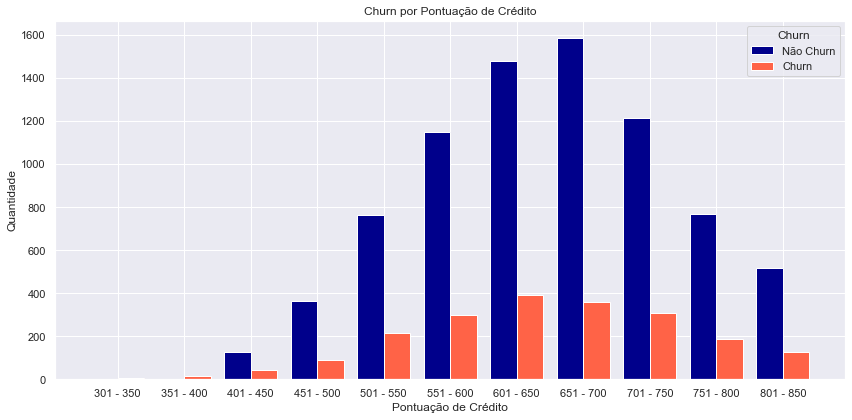

In [19]:
# Agrupar os dados por PontuacaoCredito_grupo e Churn e contar as ocorrências
grouped_PontCredito = data.groupby(['PontuacaoCredito_grupo', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_PontCredito.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_PontCredito[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Pontuação de Crédito')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Pontuação de Crédito')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

* Boxplot de clientes Churn e não-Churn da variável **Pontuação de Crédito**

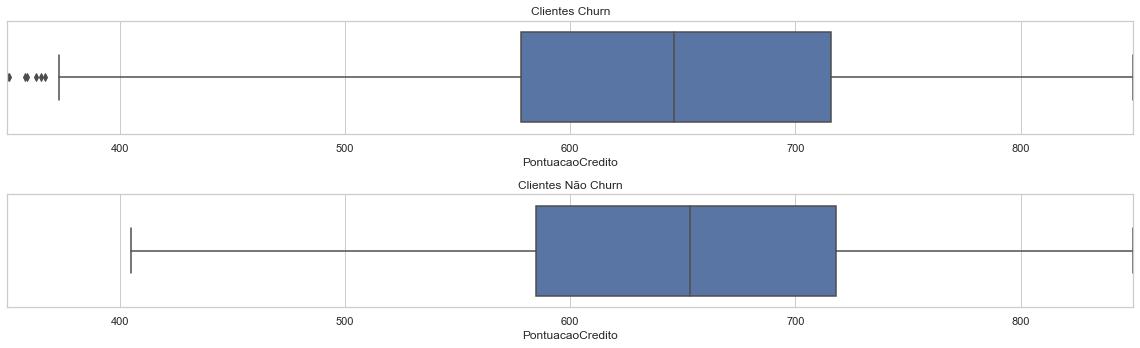

In [20]:
# Box plot da Pontuação de Crédito para clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_pontcredito = min(data['PontuacaoCredito'])
lim_max_pontcredito = max(data['PontuacaoCredito'])

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='PontuacaoCredito', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_pontcredito, lim_max_pontcredito)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='PontuacaoCredito', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_pontcredito, lim_max_pontcredito)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

Na distribuição de dados exibida é possível observar que existe uma proporcionalidade entre os grupos de pontuação de crédito criados na relação Churn x Não Churn. Todavia, destaca-se que as pontuações baixas foram identificadas, visualmente com auxilio do boxplot, que essas camadas sãoo clientes exclusivamente que não são mais clientes. Identificação importante que podemos estar excluíndo de nosso modelo futuramente.

### 3.1.3 Idade


A exploração da variável **IDADE** será semelhante a realizada na Pontuação de Crédito.

In [21]:
# Resumo dos dados da variável Idade
data['Idade'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Idade, dtype: float64

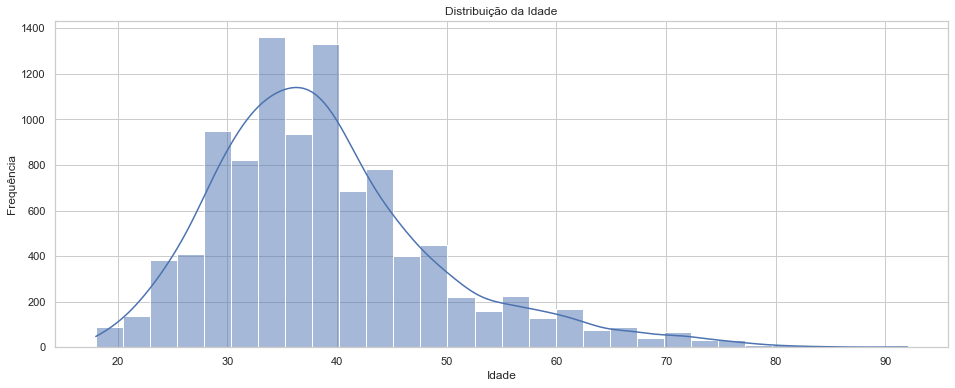

In [22]:
# Histograma
plt.figure(figsize=(16, 6))
sns.histplot(data['Idade'], bins=30, kde=True)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

A variável Idade possui dados que variam de 18 a 92 anos, com uma média de aproximadamente 39 anos. A maioria dos clientes tem idades entre 32 e 44 anos, conforme indicado pelos percentis.

Pelo histograma, identifica-se que a distribuição apresenta simetria é à direita, com uma concentração maior de clientes com idade entre 30 à 50 anos, e uma cauda longa à direita, impactada pelos clientes com idade mais avançada.

* Divindo em um grupo

In [23]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 9) 
          for i in range(11, 101, 10)]

# Criar uma nova coluna
data['Idade_grupo'] =  pd.cut(data.Idade,
                              bins=range(11, 102, 10),
                              right=False,
                              labels=labels)

# Verificando os dados da nova coluna
data['Idade_grupo'].value_counts()

31 - 40     4451
41 - 50     2320
21 - 30     1879
51 - 60      797
61 - 70      331
71 - 80      121
11 - 20       89
81 - 90       10
91 - 100       2
Name: Idade_grupo, dtype: int64

In [24]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_Idade = data.groupby('Idade_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_Idade['Total'] = grouped_Idade[0] + grouped_Idade[1]
grouped_Idade['Não_Churn_Percent'] = (grouped_Idade[0] / grouped_Idade['Total']) * 100
grouped_Idade['Churn_Percent'] = (grouped_Idade[1] / grouped_Idade['Total']) * 100

# Renomear as colunas
grouped_Idade.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_Idade.reset_index(inplace=True)

# Imprimir a tabela a partir do DataFrame
print(tabulate(grouped_Idade, headers='keys', tablefmt='pretty'))

+---+-------------+-----------+-------+-------+-------------------+--------------------+
|   | Idade_grupo | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+---+-------------+-----------+-------+-------+-------------------+--------------------+
| 0 |   11 - 20   |    84     |   5   |  89   | 94.3820224719101  | 5.617977528089887  |
| 1 |   21 - 30   |   1736    |  143  | 1879  | 92.38956891963811 | 7.610431080361894  |
| 2 |   31 - 40   |   3912    |  539  | 4451  | 87.8903617164682  | 12.10963828353179  |
| 3 |   41 - 50   |   1532    |  788  | 2320  | 66.0344827586207  | 33.96551724137931  |
| 4 |   51 - 60   |    349    |  448  |  797  | 43.7892095357591  |  56.2107904642409  |
| 5 |   61 - 70   |    227    |  104  |  331  | 68.58006042296071 | 31.419939577039273 |
| 6 |   71 - 80   |    111    |  10   |  121  | 91.73553719008265 | 8.264462809917356  |
| 7 |   81 - 90   |     9     |   1   |  10   |       90.0        |        10.0        |
| 8 |  91 - 100   |  

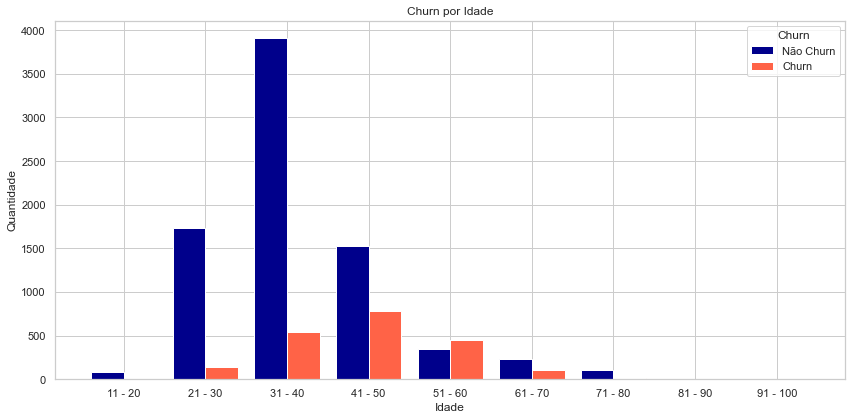

In [25]:
# Agrupar os dados e contar as ocorrências
grouped_Idade = data.groupby(['Idade_grupo', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_Idade.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_Idade[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Idade')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Idade')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

* Boxplot de clientes Churn e não-Churn da variável **Idade**

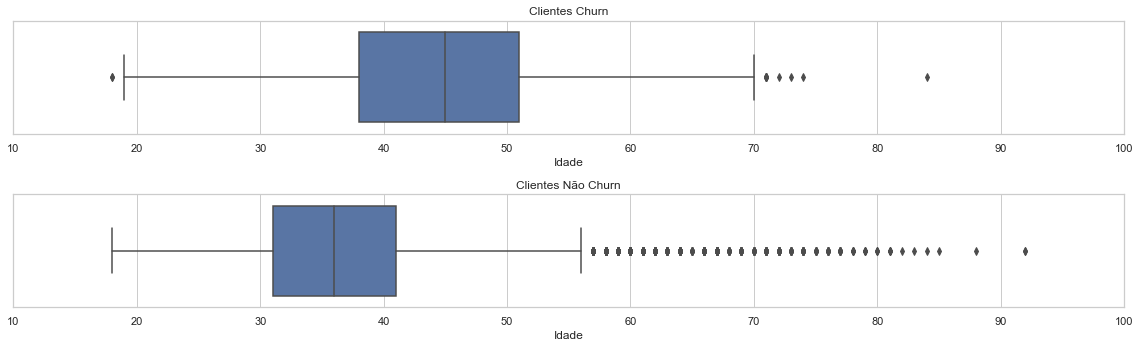

In [26]:
# Box plot da Pontuação de Crédito para clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_idade = math.floor(min(data['Idade'])/ 10) * 10
lim_max_idade = math.ceil(max(data['Idade']) / 10) * 10

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='Idade', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_idade, lim_max_idade)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='Idade', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_idade, lim_max_idade)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

Nesta variável, duas observações são importantes e interessantes para tratamentos e modelos futuros. As idades mais avançadas podem ser suprimidas do modelo por possuir poucas observações interferindo no modelo. 

Na relação Churn x Não Churn ocorre bastante desproporcionalidade entre os intervalos, podendo ser necessário fazer um balanceamento dos dados para a criação de um modelo preditivo.

### 3.1.4 Tempo Permanência


Na variável **TEMPO DE PERMANÊNCIA** o intervalo dos dados é menor, não sendo necessário fazer uma classificação por grupo.

In [27]:
# Resumo dos dados
data['TempoPermanencia'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: TempoPermanencia, dtype: float64

In [28]:
# Contando a quantidade de clientes
clientes_permanencia = data['TempoPermanencia'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_permanencia = pd.DataFrame({'Tempo Permanência (Anos)': clientes_permanencia.index, 
                               'Clientes': clientes_permanencia.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_permanencia['Clientes'].sum()
linha_total = pd.DataFrame({'Tempo Permanência (Anos)': ['Total'], 
                            'Clientes': [total_clientes]})
tb_permanencia = pd.concat([tb_permanencia, linha_total], ignore_index=True)

# Imprimir a tabela a partir do DataFrame
print(tabulate(tb_permanencia, headers='keys', tablefmt='pretty'))

+----+--------------------------+----------+
|    | Tempo Permanência (Anos) | Clientes |
+----+--------------------------+----------+
| 0  |            2             |   1048   |
| 1  |            1             |   1035   |
| 2  |            7             |   1028   |
| 3  |            8             |   1025   |
| 4  |            5             |   1012   |
| 5  |            3             |   1009   |
| 6  |            4             |   989    |
| 7  |            9             |   984    |
| 8  |            6             |   967    |
| 9  |            10            |   490    |
| 10 |            0             |   413    |
| 11 |          Total           |  10000   |
+----+--------------------------+----------+


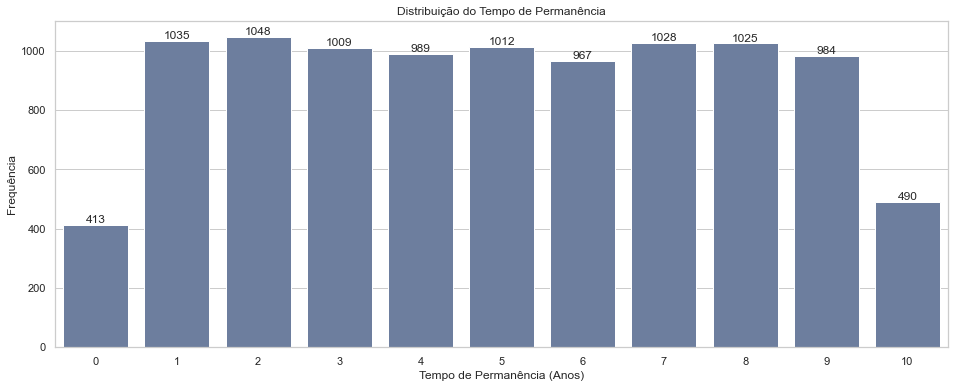

In [29]:
# Contagem de frequência
frequencia_permanencia = data['TempoPermanencia'].value_counts()

# Ordenando a série
frequencia_permanencia = frequencia_permanencia.sort_index()

# Gráfico de barras
plt.figure(figsize=(16, 6))
sns.barplot(x=frequencia_permanencia.index, 
            y=frequencia_permanencia.values, 
            color='#657BA6')
plt.xlabel('Tempo de Permanência (Anos)')
plt.ylabel('Frequência')
plt.title('Distribuição do Tempo de Permanência')

# Adicionando os rótulos de dados com alinhamento correto
for index, value in enumerate(frequencia_permanencia.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [30]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_permanencia = data.groupby('TempoPermanencia')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_permanencia['Total'] = grouped_permanencia[0] + grouped_permanencia[1]
grouped_permanencia['Não_Churn_Percent'] = (grouped_permanencia[0] / grouped_permanencia['Total']) * 100
grouped_permanencia['Churn_Percent'] = (grouped_permanencia[1] / grouped_permanencia['Total']) * 100

# Renomear as colunas
grouped_permanencia.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

# Resetar o índice para ter 'PontuacaoCredito_grupo' como uma coluna
grouped_permanencia.reset_index(inplace=True)

# Imprimir a tabela a partir do DataFrame
print(tabulate(grouped_permanencia, headers='keys', tablefmt='pretty'))

+----+------------------+-----------+-------+--------+-------------------+--------------------+
|    | TempoPermanencia | Não Churn | Churn | Total  |  Freq Não Churn   |     Freq Churn     |
+----+------------------+-----------+-------+--------+-------------------+--------------------+
| 0  |       0.0        |   318.0   | 95.0  | 413.0  | 76.99757869249395 | 23.002421307506054 |
| 1  |       1.0        |   803.0   | 232.0 | 1035.0 | 77.58454106280193 | 22.415458937198068 |
| 2  |       2.0        |   847.0   | 201.0 | 1048.0 | 80.82061068702289 |  19.1793893129771  |
| 3  |       3.0        |   796.0   | 213.0 | 1009.0 | 78.88999008919723 | 21.110009910802773 |
| 4  |       4.0        |   786.0   | 203.0 | 989.0  |  79.474216380182  | 20.525783619817997 |
| 5  |       5.0        |   803.0   | 209.0 | 1012.0 | 79.34782608695652 | 20.652173913043477 |
| 6  |       6.0        |   771.0   | 196.0 | 967.0  | 79.73112719751809 |  20.2688728024819  |
| 7  |       7.0        |   851.0   | 17

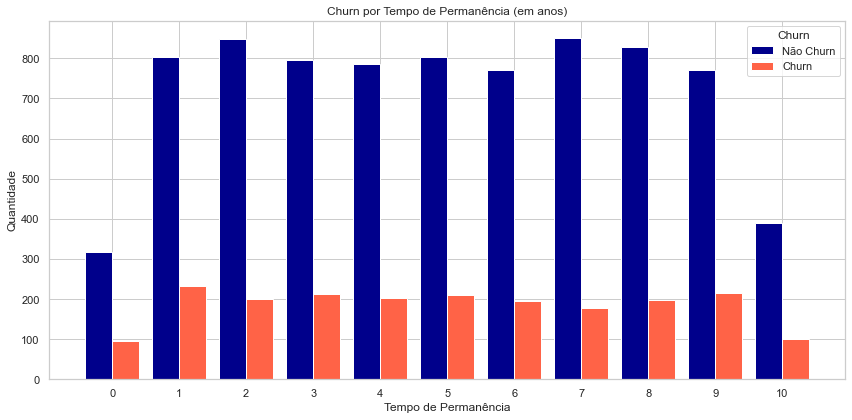

In [31]:
# Agrupar os dados e contar as ocorrências
grouped_permanencia = data.groupby(['TempoPermanencia', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_permanencia.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_permanencia[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Tempo de Permanência')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Tempo de Permanência (em anos)')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

As informações do Tempo de Permanência dos clientes na instituição demonstram valores totalmente balanceados, cujo valores são proporcionais em todos os intervalos de tempo. Desta forma, esta variável, no momento, não possui uma característica que possa influenciar a decisão do cliente de deixar a companhia, indicando que não há padrões discerníveis que expliquem o Churn do cliente.

### 3.1.5 Saldo em Conta


Na variável **SALDO EM CONTA** o intervalo de dados é maior, e, assim, será agrupado os dados para melhor visualização

In [32]:
# Resumo dos dados da variável Saldo em Conta
data['Saldo'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Saldo, dtype: float64

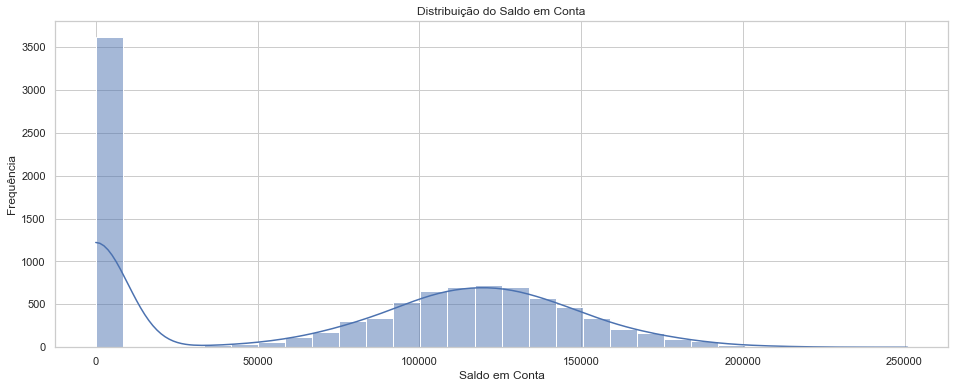

In [33]:
# Histograma 
plt.figure(figsize=(16, 6))
sns.histplot(data['Saldo'], bins=30, kde=True)
plt.title('Distribuição do Saldo em Conta')
plt.xlabel('Saldo em Conta')
plt.ylabel('Frequência')
plt.show()

Com base na distribuição da variável **Saldo em Conta**, podemos inferir que a distribuição é assimétrica, evidenciado pelo fato de que o número de clientes em cada intervalo de saldo não é uniforme. A maioria dos clientes parece ter saldos menores, enquanto há relativamente poucos clientes com saldos mais altos.

In [34]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 24999) 
          for i in range(0, 275000, 25000)]

# Criar uma nova coluna "Saldo_grupo" com base nos intervalos
data['Saldo_grupo'] = pd.cut(data.Saldo,
                             bins=range(0, 275001, 25000),
                             right=False,
                             labels=labels)

# Verificando os dados da nova coluna
data['Saldo_grupo'].value_counts()

0 - 24999          3623
100000 - 124999    2068
125000 - 149999    1762
75000 - 99999      1160
150000 - 174999     738
50000 - 74999       349
175000 - 199999     197
25000 - 49999        69
200000 - 224999      32
225000 - 249999       1
250000 - 274999       1
Name: Saldo_grupo, dtype: int64

In [35]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_saldo = data.groupby('Saldo_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_saldo['Total'] = grouped_saldo[0] + grouped_saldo[1]
grouped_saldo['Não_Churn_Percent'] = (grouped_saldo[0] / grouped_saldo['Total']) * 100
grouped_saldo['Churn_Percent'] = (grouped_saldo[1] / grouped_saldo['Total']) * 100

# Renomear as colunas
grouped_saldo.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

# Resetar o índice para ter 'PontuacaoCredito_grupo' como uma coluna
grouped_saldo.reset_index(inplace=True)

# Imprimir a tabela a partir do DataFrame
print(tabulate(grouped_saldo, headers='keys', tablefmt='pretty'))

+----+-----------------+-----------+-------+-------+-------------------+--------------------+
|    |   Saldo_grupo   | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+----+-----------------+-----------+-------+-------+-------------------+--------------------+
| 0  |    0 - 24999    |   3119    |  504  | 3623  | 86.08887662158432 | 13.911123378415677 |
| 1  |  25000 - 49999  |    47     |  22   |  69   | 68.11594202898551 | 31.88405797101449  |
| 2  |  50000 - 74999  |    274    |  75   |  349  | 78.51002865329512 | 21.48997134670487  |
| 3  |  75000 - 99999  |    934    |  226  | 1160  | 80.51724137931035 | 19.482758620689655 |
| 4  | 100000 - 124999 |   1510    |  558  | 2068  | 73.0174081237911  |  26.9825918762089  |
| 5  | 125000 - 149999 |   1333    |  429  | 1762  | 75.65266742338252 | 24.347332576617482 |
| 6  | 150000 - 174999 |    582    |  156  |  738  | 78.86178861788618 | 21.138211382113823 |
| 7  | 175000 - 199999 |    148    |  49   |  197  | 75.1269

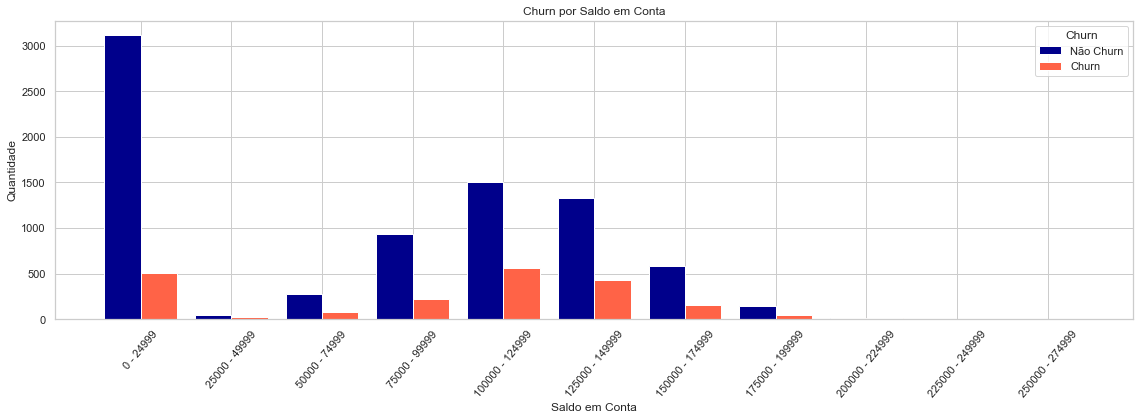

In [36]:
# Agrupar os dados e contar as ocorrências
grouped_saldo = data.groupby(['Saldo_grupo', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_saldo.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (16, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_saldo[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Saldo em Conta')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Saldo em Conta')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=50)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

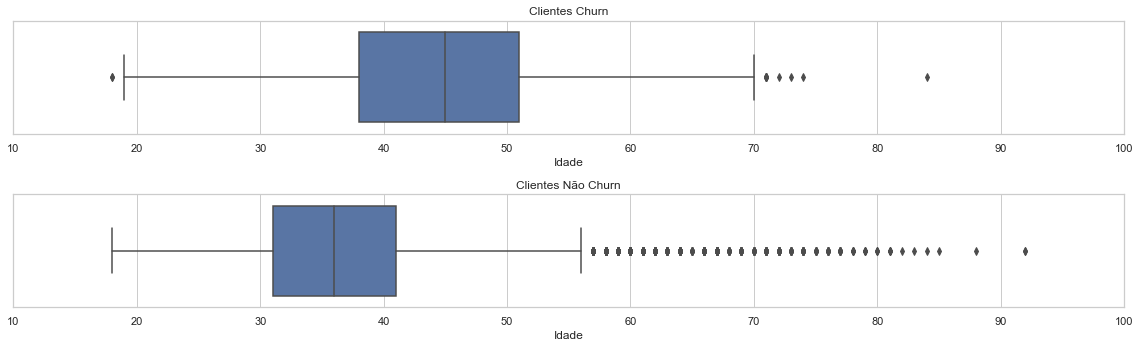

In [37]:
# Box plot da Pontuação de Crédito para clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_pontcredito = math.floor(min(data['Idade'])/ 10) * 10
lim_max_pontcredito = math.ceil(max(data['Idade']) / 10) * 10

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='Idade', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_pontcredito, lim_max_pontcredito)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='Idade', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_pontcredito, lim_max_pontcredito)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

Além da assimetria identificada, observa-se a existência de muito outliers nesta variável, sendo necessário encontrar uma forma de balanceamento destes dados, objetivando a remoção de dados que não possuem relevância e preservação da integridade e precisão do nosso modelo.

### 3.1.6 Salário


A variável **SALÁRIO** temos uma estimativa do salário dos clientes.

In [38]:
# Resumo dos dados da variável Salario Estimado
data['SalarioEstimado'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: SalarioEstimado, dtype: float64

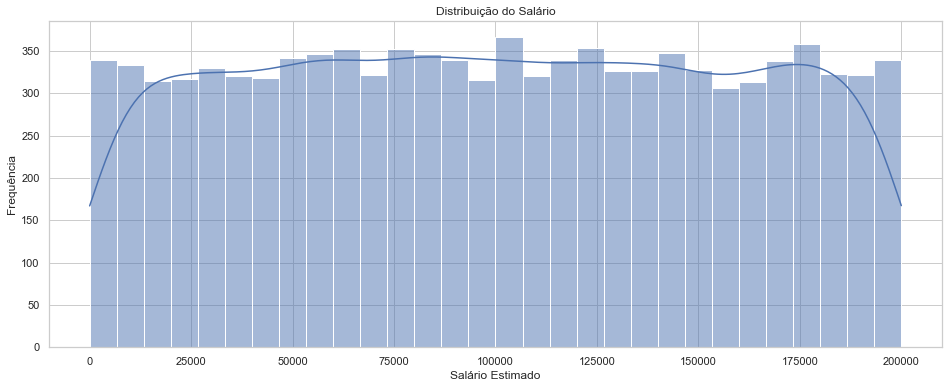

In [39]:
# Histograma 
plt.figure(figsize=(16, 6))
sns.histplot(data['SalarioEstimado'], bins=30, kde=True)
plt.title('Distribuição do Salário')
plt.xlabel('Salário Estimado')
plt.ylabel('Frequência')
plt.show()

A distribuição dos dados da variável **Salário** apresenta uma simetria, em que os valores apresentam números semelhantes entre as observações.

In [40]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 19999) for i in range(0, 200000, 20000)]

# Criar uma nova coluna "Salario_grupo" com base nos intervalos
data['Salario_grupo'] = pd.cut(data.SalarioEstimado,
                                bins=range(0, 200001, 20000),
                                right=False,
                                labels=labels)

# Verificando os dados da nova coluna
data['Salario_grupo'].value_counts()

60000 - 79999      1027
100000 - 119999    1027
160000 - 179999    1009
120000 - 139999    1007
40000 - 59999      1006
80000 - 99999      1002
0 - 19999           986
180000 - 199999     985
140000 - 159999     982
20000 - 39999       969
Name: Salario_grupo, dtype: int64

In [41]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_Salario = data.groupby('Salario_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_Salario['Total'] = grouped_Salario[0] + grouped_Salario[1]
grouped_Salario['Não_Churn_Percent'] = (grouped_Salario[0] / grouped_Salario['Total']) * 100
grouped_Salario['Churn_Percent'] = (grouped_Salario[1] / grouped_Salario['Total']) * 100

# Renomear as colunas
grouped_Salario.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_Salario.reset_index(inplace=True)

# Imprimir a tabela a partir do DataFrame
print(tabulate(grouped_Salario, headers='keys', tablefmt='pretty'))

+---+-----------------+-----------+-------+-------+-------------------+--------------------+
|   |  Salario_grupo  | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+---+-----------------+-----------+-------+-------+-------------------+--------------------+
| 0 |    0 - 19999    |    788    |  198  |  986  | 79.91886409736308 | 20.08113590263692  |
| 1 |  20000 - 39999  |    773    |  196  |  969  | 79.77296181630547 | 20.227038183694532 |
| 2 |  40000 - 59999  |    815    |  191  | 1006  | 81.01391650099403 | 18.986083499005964 |
| 3 |  60000 - 79999  |    815    |  212  | 1027  | 79.35735150925024 | 20.642648490749757 |
| 4 |  80000 - 99999  |    806    |  196  | 1002  | 80.43912175648703 | 19.560878243512974 |
| 5 | 100000 - 119999 |    816    |  211  | 1027  | 79.45472249269717 | 20.545277507302824 |
| 6 | 120000 - 139999 |    811    |  196  | 1007  | 80.53624627606753 | 19.463753723932474 |
| 7 | 140000 - 159999 |    776    |  206  |  982  | 79.0224032586558  

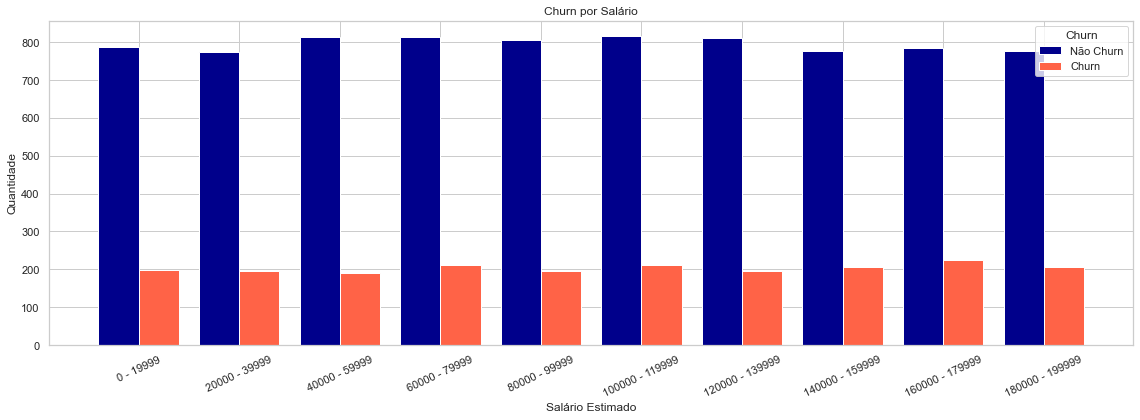

In [42]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_Salario = data.groupby('Salario_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_Salario.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (16, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_Salario[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Salário Estimado')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Salário')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=25)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

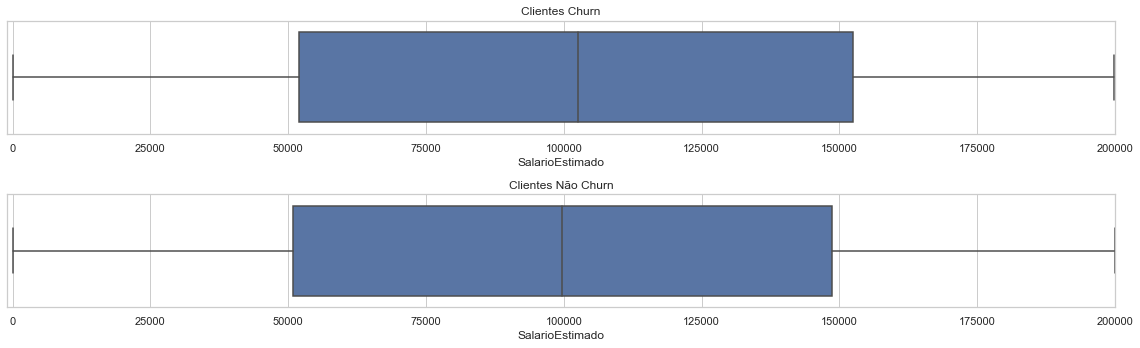

In [43]:
# Box plot para clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_salario = -1000
lim_max_salario = math.ceil(max(data['SalarioEstimado']) / 10000) * 10000

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='SalarioEstimado', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_salario, lim_max_salario)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='SalarioEstimado', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_salario, lim_max_salario)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

A relação entre Churn e Não Churn para esta variável também revela proporções idênticas entre as faixas salariais atribuídas, indicando um equilíbrio homogêneo nos dados. Dessa forma, a distribuição uniforme das observações nas diferentes faixas salariais sugere uma representação equitativa das categorias, facilitando uma análise mais precisa das relações entre o salário e a decisão dos clientes em relação à rotatividade.

### 3.1.7 Índice de Satisfação


O **ÍNDICE DE SATISFAÇÃO** é feito através de uma avaliação do cliente de 1 a 5, medindo a quealidade dos serviços prestados da companhia.

In [44]:
# Resumo dos dados da variável Indice de Satisfação
data['IndiceSatisfacao'].describe()

count    10000.000000
mean         3.013800
std          1.405919
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: IndiceSatisfacao, dtype: float64

In [45]:
# Contando a quantidade de clientes
clientes_satisafacao = data['IndiceSatisfacao'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_satisfacao = pd.DataFrame({'Satifação': clientes_satisafacao.index, 
                               'Clientes': clientes_satisafacao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_satisfacao['Clientes'].sum()
linha_total = pd.DataFrame({'Satifação': ['Total'], 
                            'Clientes': [total_clientes]})
tb_satisfacao = pd.concat([tb_satisfacao, linha_total], ignore_index=True)

# Verificando os dados da nova coluna
data['IndiceSatisfacao'].value_counts()

3    2042
2    2014
4    2008
5    2004
1    1932
Name: IndiceSatisfacao, dtype: int64

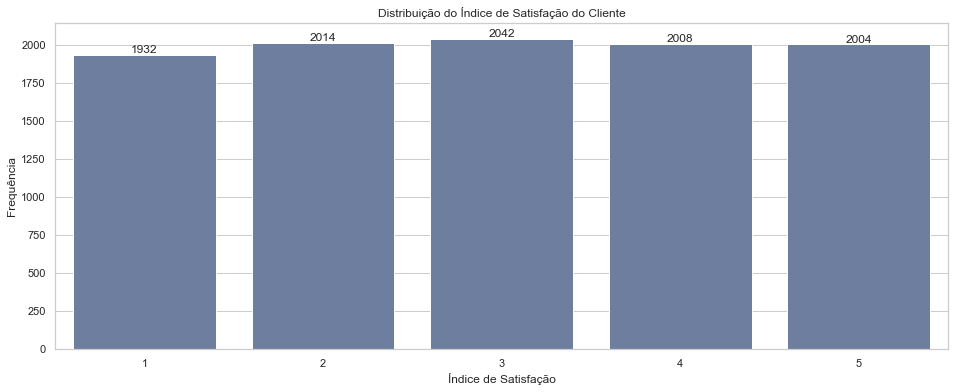

In [46]:
# Contagem de frequência
frequencia_satisfacao = data['IndiceSatisfacao'].value_counts()

# Ordenando a série
frequencia_satisfacao = frequencia_satisfacao.sort_index()

# Gráfico de barras
plt.figure(figsize=(16, 6))
sns.barplot(x=frequencia_satisfacao.index, 
            y=frequencia_satisfacao.values, 
            color='#657BA6')
plt.xlabel('Índice de Satisfação')
plt.ylabel('Frequência')
plt.title('Distribuição do Índice de Satisfação do Cliente')

# Adicionando os rótulos de dados com alinhamento correto
for index, value in enumerate(frequencia_satisfacao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [47]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_satisfacao = data.groupby('IndiceSatisfacao')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_satisfacao['Total'] = grouped_satisfacao[0] + grouped_satisfacao[1]
grouped_satisfacao['Não_Churn_Percent'] = (grouped_satisfacao[0] / grouped_satisfacao['Total']) * 100
grouped_satisfacao['Churn_Percent'] = (grouped_satisfacao[1] / grouped_satisfacao['Total']) * 100

# Renomear as colunas
grouped_satisfacao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_satisfacao.reset_index(inplace=True)

# Exibir a tabela
print(tabulate(grouped_satisfacao, headers='keys', tablefmt='pretty'))

+---+------------------+-----------+-------+--------+-------------------+--------------------+
|   | IndiceSatisfacao | Não Churn | Churn | Total  |  Freq Não Churn   |     Freq Churn     |
+---+------------------+-----------+-------+--------+-------------------+--------------------+
| 0 |       1.0        |  1545.0   | 387.0 | 1932.0 | 79.96894409937887 | 20.031055900621116 |
| 1 |       2.0        |  1575.0   | 439.0 | 2014.0 | 78.2025819265144  |  21.7974180734856  |
| 2 |       3.0        |  1641.0   | 401.0 | 2042.0 | 80.36238981390792 | 19.637610186092065 |
| 3 |       4.0        |  1594.0   | 414.0 | 2008.0 | 79.38247011952191 | 20.617529880478088 |
| 4 |       5.0        |  1607.0   | 397.0 | 2004.0 | 80.18962075848304 | 19.810379241516966 |
+---+------------------+-----------+-------+--------+-------------------+--------------------+


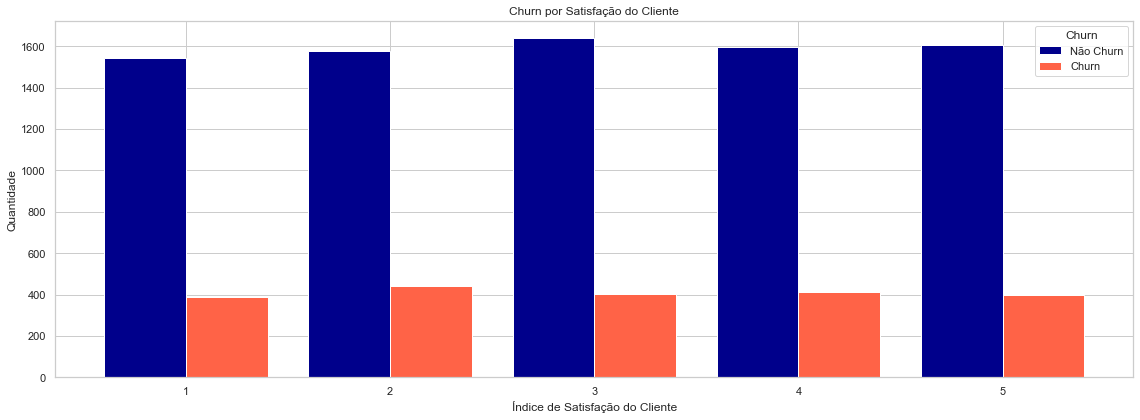

In [48]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_satisfacao = data.groupby('IndiceSatisfacao')['Churn'].value_counts().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_satisfacao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (16, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_satisfacao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Índice de Satisfação do Cliente')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Satisfação do Cliente')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

Nesta variável infere-se que a distribuição dos dados é homogênea, tanto quando avaliado a variável individualmente, quanto quando avaliado pelo Churn.
Diante destas informações, inicialmente, acredista-se como um fator não relevante para o cliente deixar a empresa, uma vez que não é possível identificar alguma característica que possa ser predominante nesta variável.

### 3.1.8 Pontos Acumulados

In [49]:
# Resumo dos dados da variável PontosAcumulados
data['PontosAcumulados'].describe()

count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: PontosAcumulados, dtype: float64

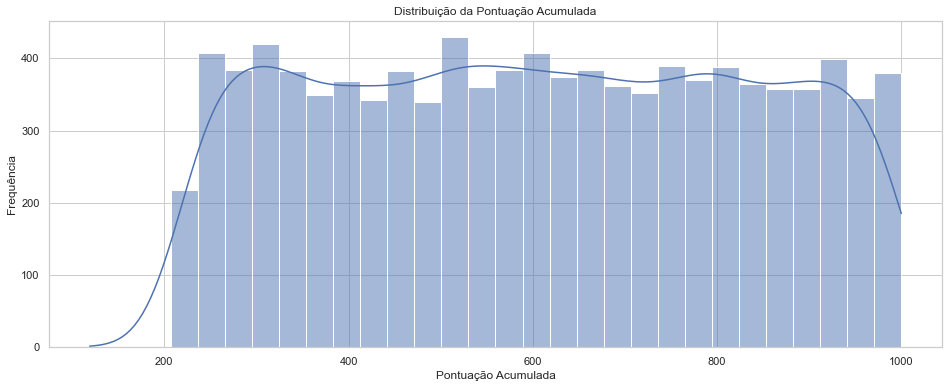

In [50]:
# Histograma
plt.figure(figsize=(16, 6))
sns.histplot(data['PontosAcumulados'], bins=30, kde=True)
plt.title('Distribuição da Pontuação Acumulada')
plt.xlabel('Pontuação Acumulada')
plt.ylabel('Frequência')
plt.show()

Os dados da variável **Pontos Acumulados** exibem uma distribuição que varia de 119 a 1000, com uma média de aproximadamente 606.52. A distribuição dos dados sugere que poucos clientes estão nas faixas menores de pontos acumulados, ocorrendo uma distribuição homogênea entre os demais intervalos.

In [51]:
# Definir os rótulos dos grupos
labels = ["{0} - {1}".format(i, i + 99) for i in range(101, 1000, 100)]

# Criar uma nova coluna 
data['PontosAcumulados_grupo'] =  pd.cut(data.PontosAcumulados,
                                        bins=range(101, 1002, 100),
                                        right=False,
                                        labels=labels)

# Verificando os dados da nova coluna
data['PontosAcumulados_grupo'].value_counts()

501 - 600     1350
701 - 800     1279
601 - 700     1274
301 - 400     1267
901 - 1000    1258
801 - 900     1243
401 - 500     1239
201 - 300     1088
101 - 200        2
Name: PontosAcumulados_grupo, dtype: int64

In [52]:
# Agrupar os dados  e contar as ocorrências de Churn e Não Churn
grouped_PontAcum = data.groupby('PontosAcumulados_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_PontAcum['Total'] = grouped_PontAcum[0] + grouped_PontAcum[1]
grouped_PontAcum['Não_Churn_Percent'] = (grouped_PontAcum[0] / grouped_PontAcum['Total']) * 100
grouped_PontAcum['Churn_Percent'] = (grouped_PontAcum[1] / grouped_PontAcum['Total']) * 100

# Renomear as colunas
grouped_PontAcum.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_PontAcum.reset_index(inplace=True)

# Exibir a tabela
print(tabulate(grouped_PontAcum, headers='keys', tablefmt='pretty'))

+---+------------------------+-----------+-------+-------+-------------------+--------------------+
|   | PontosAcumulados_grupo | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+---+------------------------+-----------+-------+-------+-------------------+--------------------+
| 0 |       101 - 200        |     1     |   1   |   2   |       50.0        |        50.0        |
| 1 |       201 - 300        |    853    |  235  | 1088  | 78.40073529411765 | 21.599264705882355 |
| 2 |       301 - 400        |   1007    |  260  | 1267  | 79.47908445146015 | 20.520915548539858 |
| 3 |       401 - 500        |   1004    |  235  | 1239  | 81.03309120258272 | 18.966908797417272 |
| 4 |       501 - 600        |   1083    |  267  | 1350  | 80.22222222222221 | 19.77777777777778  |
| 5 |       601 - 700        |   1009    |  265  | 1274  | 79.19937205651492 | 20.800627943485086 |
| 6 |       701 - 800        |    999    |  280  | 1279  | 78.1078967943706  | 21.892103205629397 |


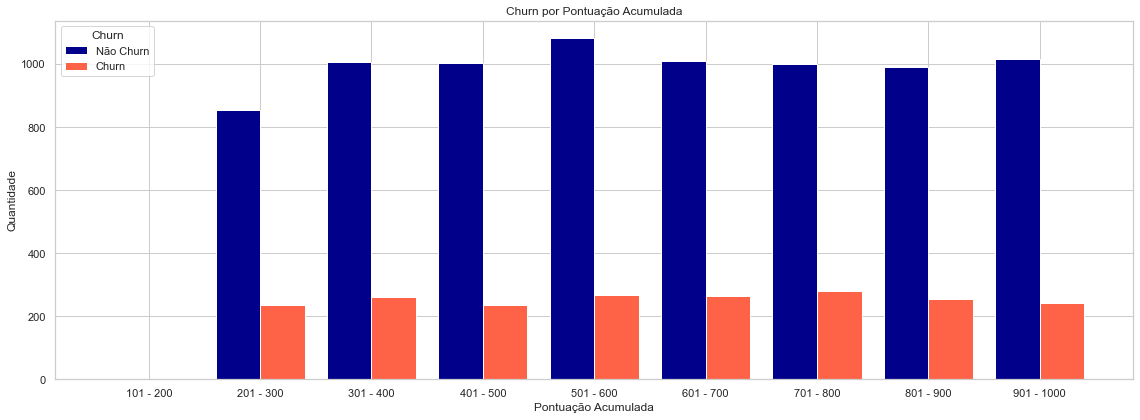

In [53]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_PontAcum = data.groupby('PontosAcumulados_grupo')['Churn'].value_counts().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_PontAcum.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (16, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_PontAcum[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Pontuação Acumulada')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Pontuação Acumulada')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

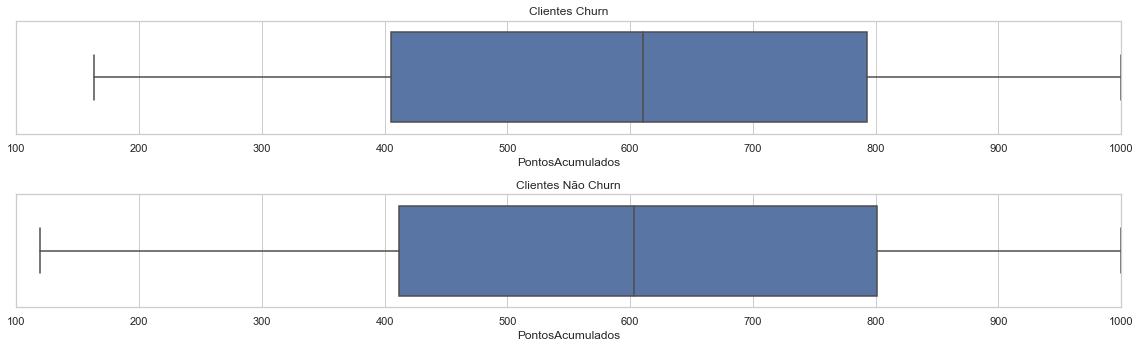

In [54]:
# Box plot da Pontuação Acumuladapara clientes Churn e não-Churn
sns.set(style="whitegrid")

# Definindo os limites para equalizações dos boxplot
lim_min_pontacum = math.floor(min(data['PontosAcumulados'])/ 100) * 100
lim_max_pontacum = math.ceil(max(data['PontosAcumulados']) / 100) * 100

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 5))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='PontosAcumulados', data=data[data['Churn'] == 1])
axes[0].set_title('Clientes Churn')

# Definir limites iguais para os eixos x
axes[0].set_xlim(lim_min_pontacum, lim_max_pontacum)

# Box plot 2 (Clientes Não Churn)
sns.boxplot(ax=axes[1], x='PontosAcumulados', data=data[data['Churn'] == 0])
axes[1].set_title('Clientes Não Churn')

# Definir limites iguais para os eixos x
axes[1].set_xlim(lim_min_pontacum, lim_max_pontacum)

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

Com exceção do primeiro grupo, em razão do pouco número de observações, as demais faixas exibem proporções semelhantes na relação Churn x Não Churn. Devido à proximidade entre os valores de cada grupo, é possível inferir que a variável "Pontos Acumulados" não parece ser uma característica determinante para a decisão do cliente de deixar a companhia.

### 3.1.9 Localização

As variáveis **LOCALIZAÇÃO**, **GÊNERO** e **TIPOS DE CARTÃO** são categóricas e a análise incial está sendo realizada para identicação destes dados e quais informações relevantes podem ser extraídas para o modelo futuramente

In [55]:
 paises = data['Localizacao'].unique() 
 print(paises)

['France' 'Spain' 'Germany']


In [56]:
# Contando a quantidade de clientes por país
clientes_localizacao = data['Localizacao'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_localizacao = pd.DataFrame({'País': clientes_localizacao.index, 
                               'Clientes': clientes_localizacao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_localizacao['Clientes'].sum()
linha_total = pd.DataFrame({'País': ['Total'], 
                            'Clientes': [total_clientes]})
tb_localizacao = pd.concat([tb_localizacao, linha_total], ignore_index=True)

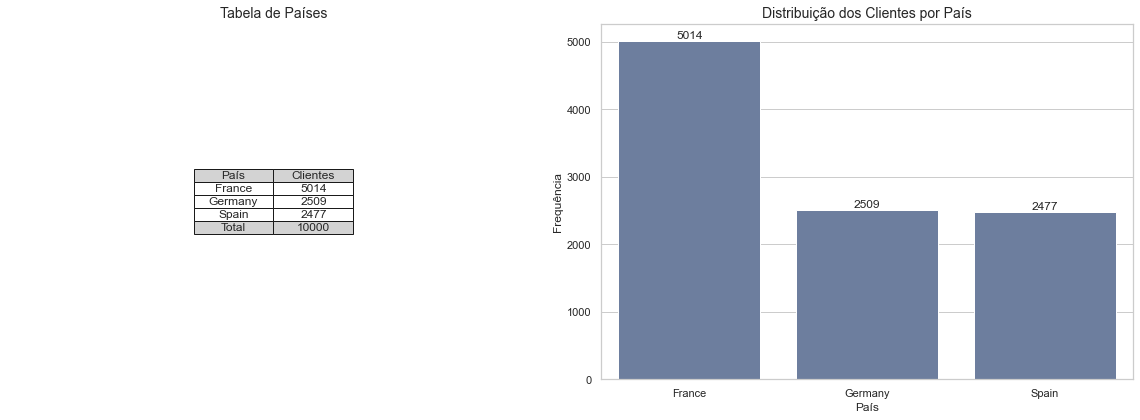

In [57]:
# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

frequencia_paises = data['Localizacao'].value_counts()

# Plotando a tabela tb_churn no primeiro subplot
axes[0].axis('off')  
axes[0].table(cellText=tb_localizacao.values,
              colLabels=tb_localizacao.columns,
              cellLoc='center',
              loc='center',
              colColours=['lightgray', 'lightgray'],
              cellColours=[['white', 'white'], 
                           ['white', 'white'], 
                           ['white', 'white'],
                           ['lightgray', 'lightgray']],
              colLoc='center',
              colWidths=[0.15, 0.15])
axes[0].set_title('Tabela de Países', fontsize=14)

# Gráfico de barras para a distribuição original no segundo subplot
sns.barplot(x=frequencia_paises.index, y=frequencia_paises.values, color='#657BA6', ax=axes[1])
axes[1].set_xlabel('País')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição dos Clientes por País', fontsize=14)

# Adicionando os rótulos de dados no gráfico de barras
for index, value in enumerate(frequencia_paises.values):
    axes[1].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [58]:
# Agrupar os dados por localização e contar as ocorrências de Churn e Não Churn
grouped_Localizacao = data.groupby('Localizacao')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_Localizacao['Total'] = grouped_Localizacao[0] + grouped_Localizacao[1]
grouped_Localizacao['Não_Churn_Percent'] = (grouped_Localizacao[0] / grouped_Localizacao['Total']) * 100
grouped_Localizacao['Churn_Percent'] = (grouped_Localizacao[1] / grouped_Localizacao['Total']) * 100

# Renomear as colunas
grouped_Localizacao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

# Resetar o índice para ter 'PontuacaoCredito_grupo' como uma coluna
grouped_Localizacao.reset_index(inplace=True)

# Exibir a tabela
print(tabulate(grouped_Localizacao, headers='keys', tablefmt='pretty'))

+---+-------------+-----------+-------+-------+-------------------+--------------------+
|   | Localizacao | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+---+-------------+-----------+-------+-------+-------------------+--------------------+
| 0 |   France    |   4203    |  811  | 5014  | 83.82528919026726 | 16.174710809732748 |
| 1 |   Germany   |   1695    |  814  | 2509  | 67.55679553607014 | 32.44320446392985  |
| 2 |    Spain    |   2064    |  413  | 2477  | 83.3266047638272  | 16.673395236172787 |
+---+-------------+-----------+-------+-------+-------------------+--------------------+


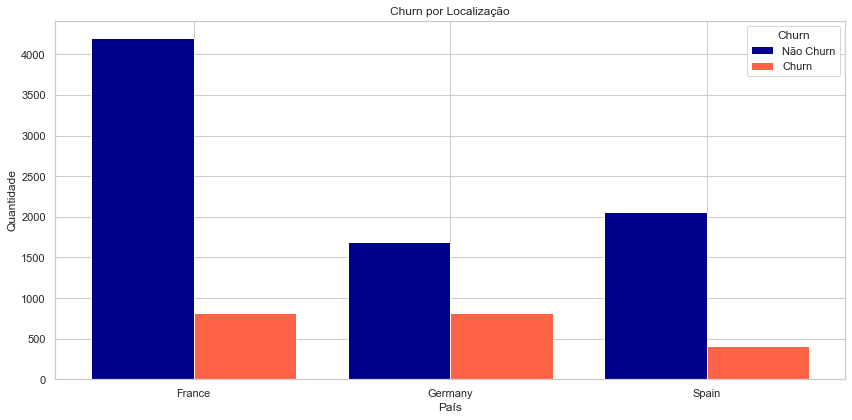

In [59]:
# Agrupar os dados por PontuacaoCredito_grupo e Churn e contar as ocorrências
grouped_Localizacao = data.groupby(['Localizacao', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_Localizacao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (12, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_Localizacao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('País')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Localização')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

Esta variável implica que a localização dos clientes pode ter impacto na decisão de Churn, especialmente na Alemanha, onde uma proporção significativamente maior de clientes opta por sair. É possível destacar que a quantidade de saída de clientes na Alemanha é semelhante à observada na França, que concentra o dobro de clientes, necessitando, possivelmente, um balanceamento de dados num modelo futuro.

### 3.1.10 Gênero

In [60]:
genero = data['Genero'].unique() 
print(genero)

['Female' 'Male']


In [61]:
# Contando a quantidade de clientes
clientes_genero = data['Genero'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_genero = pd.DataFrame({'Gênero': clientes_genero.index, 
                          'Clientes': clientes_genero.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_genero['Clientes'].sum()
linha_total = pd.DataFrame({'Gênero': ['Total'], 
                            'Clientes': [total_clientes]})
tb_genero = pd.concat([tb_genero, linha_total], ignore_index=True)

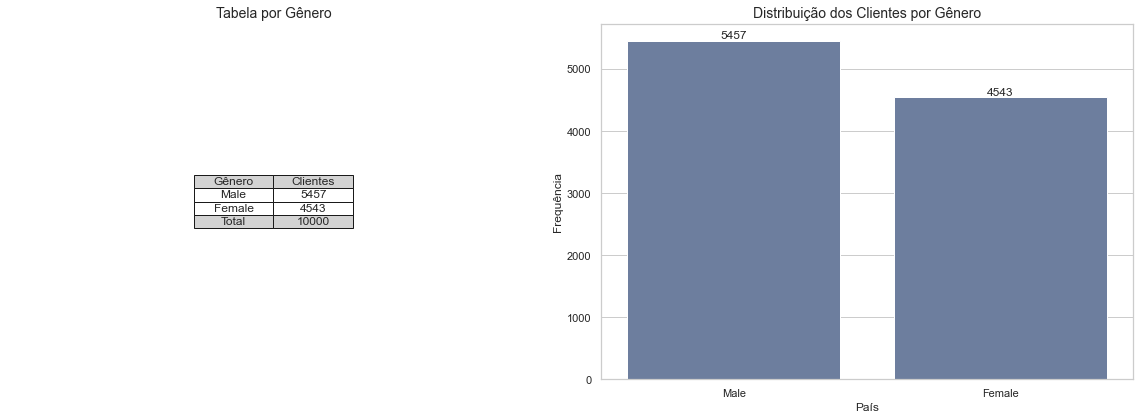

In [62]:
frequencia_genero = data['Genero'].value_counts()

# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotando a tabela tb_churn no primeiro subplot
axes[0].axis('off')  
axes[0].table(cellText=tb_genero.values,
              colLabels=tb_genero.columns,
              cellLoc='center',
              loc='center',
              colColours=['lightgray', 'lightgray'],
              cellColours=[['white', 'white'], 
                           ['white', 'white'],
                           ['lightgray', 'lightgray']],
              colLoc='center',
              colWidths=[0.15, 0.15])
axes[0].set_title('Tabela por Gênero', fontsize=14)

# Gráfico de barras para a distribuição original no segundo subplot
sns.barplot(x=frequencia_genero.index, y=frequencia_genero.values, color='#657BA6', ax=axes[1])
axes[1].set_xlabel('País')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição dos Clientes por Gênero', fontsize=14)

# Adicionando os rótulos de dados no gráfico de barras
for index, value in enumerate(frequencia_genero.values):
    axes[1].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [63]:
# Agrupar os dados por genero e contar as ocorrências de Churn e Não Churn
grouped_genero = data.groupby('Genero')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_genero['Total'] = grouped_genero[0] + grouped_genero[1]
grouped_genero['Não_Churn_Percent'] = (grouped_genero[0] / grouped_genero['Total']) * 100
grouped_genero['Churn_Percent'] = (grouped_genero[1] / grouped_genero['Total']) * 100

# Renomear as colunas
grouped_genero.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_genero.reset_index(inplace=True)

# Exibir a tabela
print(tabulate(grouped_genero, headers='keys', tablefmt='pretty'))

+---+--------+-----------+-------+-------+-------------------+--------------------+
|   | Genero | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+---+--------+-----------+-------+-------+-------------------+--------------------+
| 0 | Female |   3404    | 1139  | 4543  | 74.92846136913933 | 25.071538630860662 |
| 1 |  Male  |   4558    |  899  | 5457  | 83.52574674729705 | 16.47425325270295  |
+---+--------+-----------+-------+-------+-------------------+--------------------+


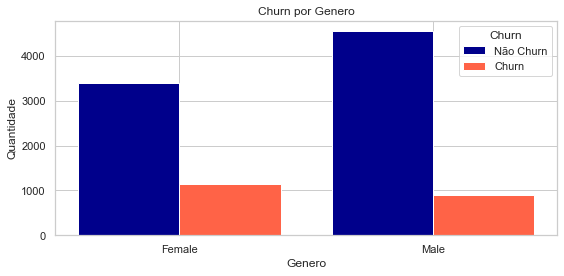

In [64]:
# Agrupar os dados por Genero e Churn e contar as ocorrências
grouped_genero = data.groupby(['Genero', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_genero.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (8, 4))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_genero[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Genero')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Genero')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

Embora a diferença entre as os gêneros masculino e feminino não seja significativa, é possível verificar que a uma tendência maior saída de cliente do sexo feminino.

### 3.1.11 Tipo de Cartão


In [65]:
cartao = data['TipoCartao'].unique() 
print(cartao)

['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']


In [66]:
# Contando a quantidade de clientes
clientes_tipocartao = data['TipoCartao'].value_counts()

# Criando um DataFrame a partir dos valores contados
tb_tipocartao = pd.DataFrame({'Tipo Cartão': clientes_tipocartao.index, 
                               'Clientes': clientes_tipocartao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_tipocartao['Clientes'].sum()
linha_total = pd.DataFrame({'Tipo Cartão': ['Total'], 
                            'Clientes': [total_clientes]})
tb_tipocartao = pd.concat([tb_tipocartao, linha_total], ignore_index=True)

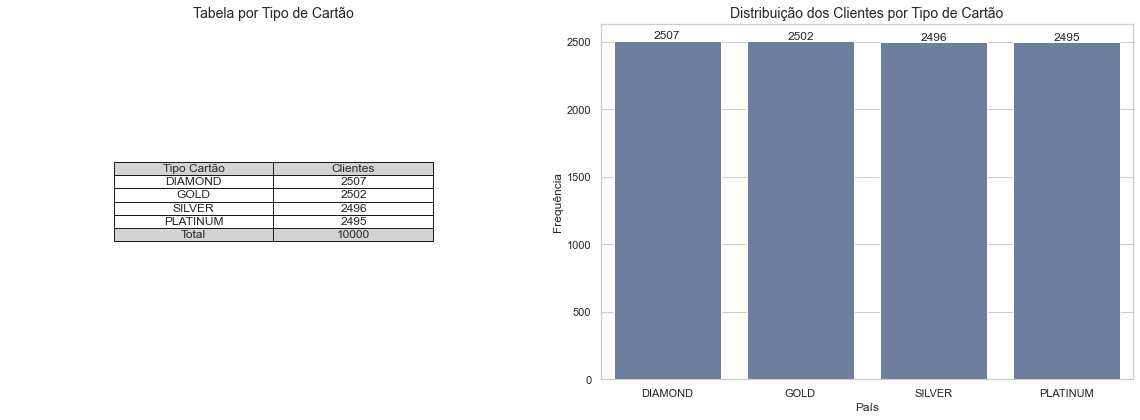

In [67]:
frequencia_tipocartao = data['TipoCartao'].value_counts()

# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotando a tabela tb_churn no primeiro subplot
axes[0].axis('off')  
axes[0].table(cellText=tb_tipocartao.values,
              colLabels=tb_tipocartao.columns,
              cellLoc='center',
              loc='center',
              colColours=['lightgray', 'lightgray'],
              cellColours=[['white', 'white'], 
                           ['white', 'white'],
                           ['white', 'white'],
                           ['white', 'white'],
                           ['lightgray', 'lightgray']],
              colLoc='center',
              colWidths=[0.3, 0.3])
axes[0].set_title('Tabela por Tipo de Cartão', fontsize=14)

# Gráfico de barras para a distribuição original no segundo subplot
sns.barplot(x=frequencia_tipocartao.index, y=frequencia_tipocartao.values, color='#657BA6', ax=axes[1])
axes[1].set_xlabel('País')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição dos Clientes por Tipo de Cartão', fontsize=14)

# Adicionando os rótulos de dados no gráfico de barras
for index, value in enumerate(frequencia_tipocartao.values):
    axes[1].text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [68]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_TipoCartao = data.groupby('TipoCartao')['Churn'].value_counts().unstack(fill_value=0)

# Calcular percentuais de Churn e Não Churn
grouped_TipoCartao['Total'] = grouped_TipoCartao[0] + grouped_TipoCartao[1]
grouped_TipoCartao['Não_Churn_Percent'] = (grouped_TipoCartao[0] / grouped_TipoCartao['Total']) * 100
grouped_TipoCartao['Churn_Percent'] = (grouped_TipoCartao[1] / grouped_TipoCartao['Total']) * 100

# Renomear as colunas
grouped_TipoCartao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_TipoCartao.reset_index(inplace=True)

# Exibir a tabela
print(tabulate(grouped_TipoCartao, headers='keys', tablefmt='pretty'))

+---+------------+-----------+-------+-------+-------------------+--------------------+
|   | TipoCartao | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+---+------------+-----------+-------+-------+-------------------+--------------------+
| 0 |  DIAMOND   |   1961    |  546  | 2507  | 78.22098125249302 | 21.77901874750698  |
| 1 |    GOLD    |   2020    |  482  | 2502  | 80.73541167066347 | 19.26458832933653  |
| 2 |  PLATINUM  |   1987    |  508  | 2495  | 79.63927855711422 | 20.360721442885772 |
| 3 |   SILVER   |   1994    |  502  | 2496  | 79.88782051282051 | 20.11217948717949  |
+---+------------+-----------+-------+-------+-------------------+--------------------+


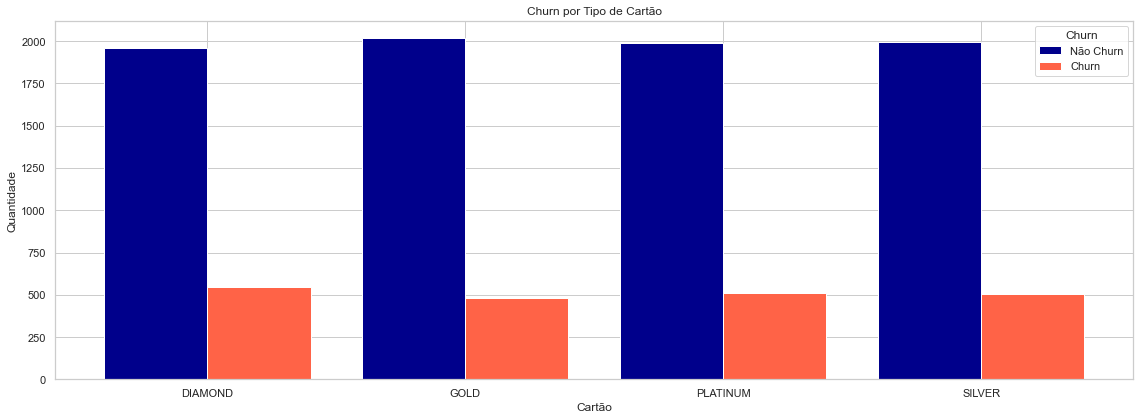

In [69]:
# Agrupar os dados  e contar as ocorrências
grouped_TipoCartao = data.groupby(['TipoCartao', 'Churn']).size().unstack(fill_value=0)

# Definir os rótulos das categorias e a largura das barras
categories = grouped_TipoCartao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (16, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_TipoCartao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Cartão')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Tipo de Cartão')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

Esta variável apresenta proporcionalidade semelhantes entre si, tanto nos serviços ofertados quanto na relação Churn x Não Churn.

### 3.1.12 Tem Cartão de Crédito?


As próximas variáveis apresentam dados referentes aos serviços prestados e também sobre o comportamento do cliente. Elas são identificados por 2 alternativas: 0 - Não e 1 - Sim

In [70]:
credito = data['TemCartaoCredito'].unique() 
print(credito)

[1 0]


In [71]:
# Contando a quantidade de clientes com e sem cartão de crédito
clientes_cartao = data['TemCartaoCredito'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
clientes_cartao.index = clientes_cartao.index.map({0: 'Não Possui', 1: 'Possui'})

# Criando um DataFrame a partir dos valores contados
tb_cartao = pd.DataFrame({'Tem Cartão?': clientes_cartao.index, 
                          'Clientes': clientes_cartao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_cartao['Clientes'].sum()
linha_total = pd.DataFrame({'Tem Cartão?': ['Total'], 
                            'Clientes': [total_clientes]})
tb_cartao = pd.concat([tb_cartao, linha_total], ignore_index=True)

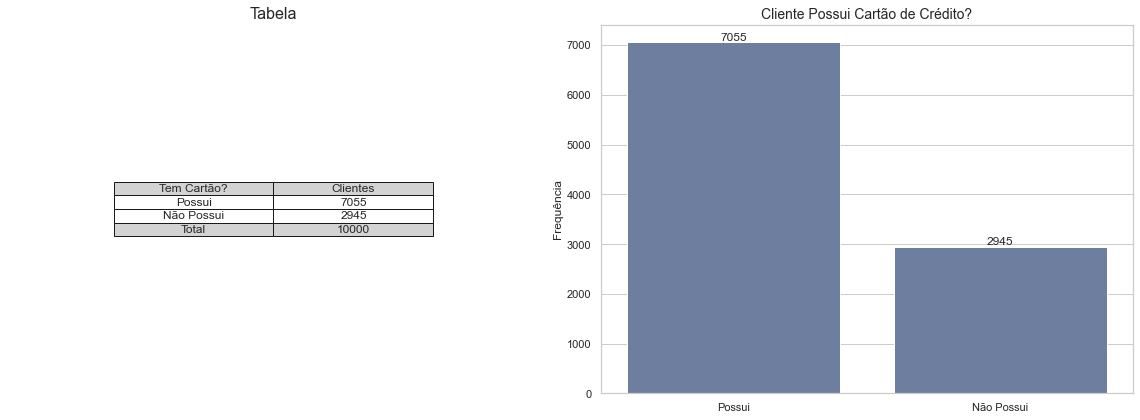

In [72]:
frequencia_cartao = data['TemCartaoCredito'].value_counts()
frequencia_cartao.index = frequencia_cartao.index.map({0: 'Não Possui', 1: 'Possui'})

# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotando a tabela tb_churn no primeiro subplot
axes[0].axis('off')  
axes[0].table(cellText=tb_cartao.values,
              colLabels=tb_cartao.columns,
              cellLoc='center',
              loc='center',
              colColours=['lightgray', 'lightgray'],
              cellColours=[['white', 'white'], 
                           ['white', 'white'],
                           ['lightgray', 'lightgray']],
              colLoc='center',
              colWidths=[0.3, 0.3])
axes[0].set_title('Tabela', fontsize=16)

# Gráfico de barras para a distribuição original no segundo subplot
sns.barplot(x=frequencia_cartao.index, y=frequencia_cartao.values, color='#657BA6', ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Cliente Possui Cartão de Crédito?', fontsize=14)

# Adicionando os rótulos de dados no gráfico de barras
for index, value in enumerate(frequencia_cartao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [73]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_cartao = data.groupby('TemCartaoCredito')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_cartao.index = grouped_cartao.index.map({0: 'Não Possui', 1: 'Possui'})

# Calcular percentuais de Churn e Não Churn
grouped_cartao['Total'] = grouped_cartao[0] + grouped_cartao[1]
grouped_cartao['Não_Churn_Percent'] = (grouped_cartao[0] / grouped_cartao['Total']) * 100
grouped_cartao['Churn_Percent'] = (grouped_cartao[1] / grouped_cartao['Total']) * 100

# Renomear as colunas
grouped_cartao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_cartao.reset_index(inplace=True)

# Exibir a tabela
print(tabulate(grouped_cartao, headers='keys', tablefmt='pretty'))

+---+------------------+-----------+-------+-------+-------------------+--------------------+
|   | TemCartaoCredito | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+---+------------------+-----------+-------+-------+-------------------+--------------------+
| 0 |    Não Possui    |   2332    |  613  | 2945  | 79.18505942275043 | 20.814940577249573 |
| 1 |      Possui      |   5630    | 1425  | 7055  | 79.80155917788802 | 20.198440822111976 |
+---+------------------+-----------+-------+-------+-------------------+--------------------+


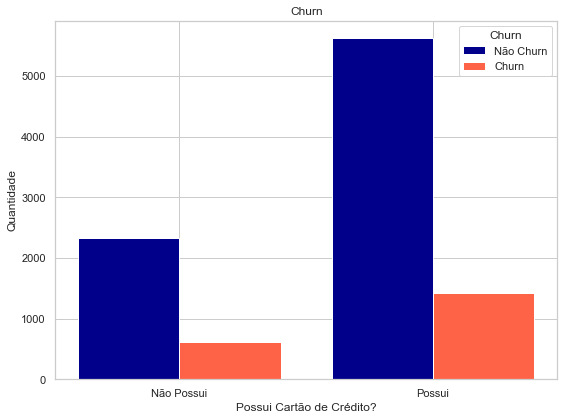

In [74]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_cartao = data.groupby('TemCartaoCredito')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_cartao.index = grouped_cartao.index.map({0: 'Não Possui', 1: 'Possui'})

# Definir os rótulos das categorias e a largura das barras
categories = grouped_cartao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (8, 4))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_cartao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Possui Cartão de Crédito?')
ax.set_ylabel('Quantidade')
ax.set_title('Churn')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

70,55% dos clientes possuem cartão de crédito, sendo possível visualizar que a taxa de Churn é semelhante entre as duas opções. Diante disso, a posse de um cartão de crédito não parece ser um fator significativo que influencia diretamente a decisão de dos clientes de sair da companhia.

### 3.1.13 Membro Ativo

In [75]:
credito = data['MembroAtivo'].unique() 
print(credito)

[1 0]


In [76]:
# Contando a quantidade de clientes
clientes_ativo = data['MembroAtivo'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
clientes_ativo.index = clientes_ativo.index.map({0: 'Não', 1: 'Sim'})

# Criando um DataFrame a partir dos valores contados
tb_ativo = pd.DataFrame({'É cliente ativo?': clientes_ativo.index, 
                          'Clientes': clientes_ativo.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_ativo['Clientes'].sum()
linha_total = pd.DataFrame({'É cliente ativo?': ['Total'], 
                            'Clientes': [total_clientes]})
tb_ativo = pd.concat([tb_ativo, linha_total], ignore_index=True)

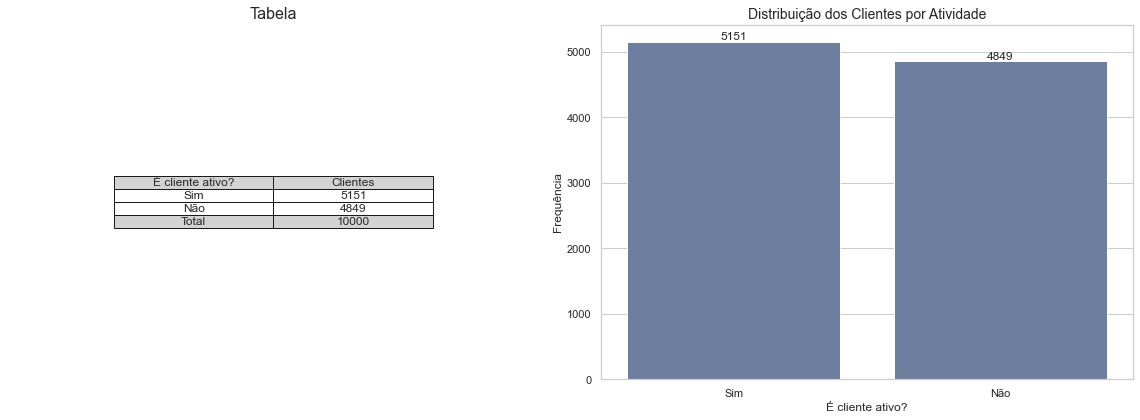

In [77]:
frequencia_ativo = data['MembroAtivo'].value_counts()
frequencia_ativo.index = frequencia_ativo.index.map({0: 'Não', 1: 'Sim'})

# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotando a tabela tb_churn no primeiro subplot
axes[0].axis('off')  
axes[0].table(cellText=tb_ativo.values,
              colLabels=tb_ativo.columns,
              cellLoc='center',
              loc='center',
              colColours=['lightgray', 'lightgray'],
              cellColours=[['white', 'white'], 
                           ['white', 'white'],
                           ['lightgray', 'lightgray']],
              colLoc='center',
              colWidths=[0.3, 0.3])
axes[0].set_title('Tabela', fontsize=16)

# Gráfico de barras para a distribuição original no segundo subplot
sns.barplot(x=frequencia_ativo.index, y=frequencia_ativo.values, color='#657BA6', ax=axes[1])
axes[1].set_xlabel('É cliente ativo?')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição dos Clientes por Atividade', fontsize=14)

# Adicionando os rótulos de dados no gráfico de barras
for index, value in enumerate(frequencia_ativo.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [78]:
# Agrupar os dados  e contar as ocorrências de Churn e Não Churn
grouped_ativo = data.groupby('MembroAtivo')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_ativo.index = grouped_ativo.index.map({0: 'Não', 1: 'Sim'})

# Calcular percentuais de Churn e Não Churn
grouped_ativo['Total'] = grouped_ativo[0] + grouped_ativo[1]
grouped_ativo['Não_Churn_Percent'] = (grouped_ativo[0] / grouped_ativo['Total']) * 100
grouped_ativo['Churn_Percent'] = (grouped_ativo[1] / grouped_ativo['Total']) * 100

# Renomear as colunas
grouped_ativo.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_ativo.reset_index(inplace=True)

# Exibir a tabela
print(tabulate(grouped_ativo, headers='keys', tablefmt='pretty'))

+---+-------------+-----------+-------+-------+-------------------+--------------------+
|   | MembroAtivo | Não Churn | Churn | Total |  Freq Não Churn   |     Freq Churn     |
+---+-------------+-----------+-------+-------+-------------------+--------------------+
| 0 |     Não     |   3546    | 1303  | 4849  | 73.12848009898948 | 26.871519901010515 |
| 1 |     Sim     |   4416    |  735  | 5151  | 85.73092603377985 | 14.269073966220153 |
+---+-------------+-----------+-------+-------+-------------------+--------------------+


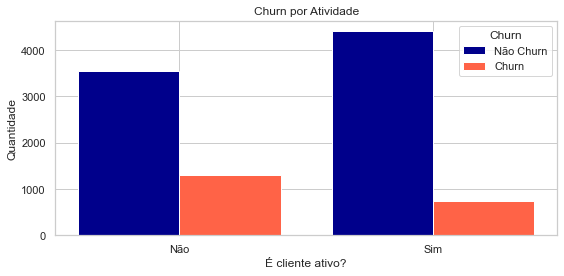

In [79]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_ativo = data.groupby('MembroAtivo')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_ativo.index = grouped_ativo.index.map({0: 'Não', 1: 'Sim'})

# Definir os rótulos das categorias e a largura das barras
categories = grouped_ativo.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (8, 4))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_ativo[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('É cliente ativo?')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Atividade')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

Verifica-se que a proporção entre clientes ativos e não ativos é equilibrada. Ser um membro ativo parece ser um fator importante na retenção de clientes, pois os clientes ativos têm uma taxa de Churn significativamente menor em comparação com os não membros ativos.

### 3.1.14 Reclamações

In [80]:
credito = data['Reclamacoes'].unique() 
print(credito)


[1 0]


In [81]:
# Contando a quantidade de clientes
clientes_reclamacao = data['Reclamacoes'].value_counts()

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
clientes_reclamacao.index = clientes_reclamacao.index.map({0: 'Não', 1: 'Sim'})

# Criando um DataFrame a partir dos valores contados
tb_reclamacao = pd.DataFrame({'Teve Reclamação?': clientes_reclamacao.index, 
                          'Clientes': clientes_reclamacao.values})

# Adicionando uma linha de total ao DataFrame
total_clientes = tb_reclamacao['Clientes'].sum()
linha_total = pd.DataFrame({'Teve Reclamação?': ['Total'], 
                            'Clientes': [total_clientes]})
tb_cartao = pd.concat([tb_reclamacao, linha_total], ignore_index=True)

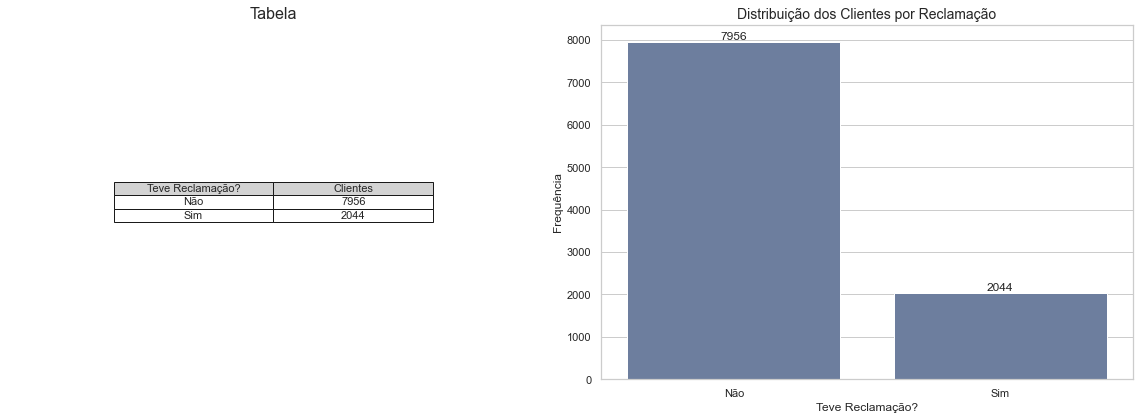

In [82]:
frequencia_reclamacao = data['Reclamacoes'].value_counts()
frequencia_reclamacao.index = frequencia_reclamacao.index.map({0: 'Não', 1: 'Sim'})

# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotando a tabela tb_churn no primeiro subplot
axes[0].axis('off')  
axes[0].table(cellText=tb_reclamacao.values,
              colLabels=tb_reclamacao.columns,
              cellLoc='center',
              loc='center',
              colColours=['lightgray', 'lightgray'],
              cellColours=[['white', 'white'], 
                           ['white', 'white']],
              colLoc='center',
              colWidths=[0.3, 0.3])
axes[0].set_title('Tabela', fontsize=16)

# Gráfico de barras para a distribuição original no segundo subplot
sns.barplot(x=frequencia_reclamacao.index, y=frequencia_reclamacao.values, color='#657BA6', ax=axes[1])
axes[1].set_xlabel('Teve Reclamação?')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição dos Clientes por Reclamação', fontsize=14)

# Adicionando os rótulos de dados no gráfico de barras
for index, value in enumerate(frequencia_reclamacao.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [83]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_reclamacao = data.groupby('Reclamacoes')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_reclamacao.index = grouped_reclamacao.index.map({0: 'Não', 1: 'Sim'})

# Calcular percentuais de Churn e Não Churn
grouped_reclamacao['Total'] = grouped_reclamacao[0] + grouped_reclamacao[1]
grouped_reclamacao['Não_Churn_Percent'] = (grouped_reclamacao[0] / grouped_reclamacao['Total']) * 100
grouped_reclamacao['Churn_Percent'] = (grouped_reclamacao[1] / grouped_reclamacao['Total']) * 100

# Renomear as colunas
grouped_reclamacao.columns = ['Não Churn', 'Churn', 'Total', 'Freq Não Churn', 'Freq Churn']

grouped_reclamacao.reset_index(inplace=True)

# Exibir a tabela
print(tabulate(grouped_reclamacao, headers='keys', tablefmt='pretty'))

+---+-------------+-----------+-------+-------+--------------------+----------------------+
|   | Reclamacoes | Não Churn | Churn | Total |   Freq Não Churn   |      Freq Churn      |
+---+-------------+-----------+-------+-------+--------------------+----------------------+
| 0 |     Não     |   7952    |   4   | 7956  | 99.94972347913524  | 0.050276520864756154 |
| 1 |     Sim     |    10     | 2034  | 2044  | 0.4892367906066536 |  99.51076320939335   |
+---+-------------+-----------+-------+-------+--------------------+----------------------+


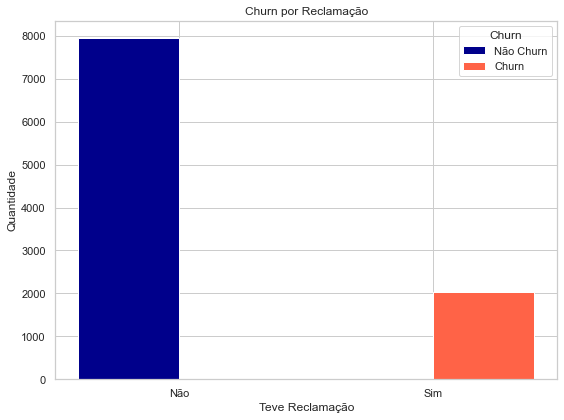

In [84]:
# Agrupar os dados e contar as ocorrências de Churn e Não Churn
grouped_reclamacao = data.groupby('Reclamacoes')['Churn'].value_counts().unstack(fill_value=0)

# Substituindo os valores 0 e 1 pelos rótulos correspondentes
grouped_reclamacao.index = grouped_reclamacao.index.map({0: 'Não', 1: 'Sim'})

# Definir os rótulos das categorias e a largura das barras
categories = grouped_reclamacao.index
x = np.arange(len(categories))
width = 0.4

# Criar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize = (8, 6))
for i, (churn_label, color) in enumerate(zip([0, 1], ['darkblue', 'tomato'])):
    values = grouped_reclamacao[churn_label].values
    ax.bar(x + i * width, values, width, label=churn_label, color=color)

# Personalizar o gráfico
ax.set_xlabel('Teve Reclamação')
ax.set_ylabel('Quantidade')
ax.set_title('Churn por Reclamação')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(categories, rotation=0)

# Adicionar legenda
legend_labels = ['Não Churn', 'Churn']
ax.legend((legend_labels), title='Churn')

plt.tight_layout()
plt.show()

Nesta variável podemos destacar que a presença de reclamações por parte dos clientes é um indicador forte de Churn, com uma taxa extremamente alta de Churn entre esses clientes.

## 3.2 - Analisando da Relação Entre as Variáveis

### 3.2.1 - Verificando a relação entre as variaveis

Além de analisar o comportamento das variáveis em relação ao Churn, também investigaremos como essas variáveis interagem entre si. Utilizamos mapas de calor (Heat Maps) como uma representação gráfica para entender a correlação entre as variáveis.

É possível que a maioria das variáveis não apresente uma relação significativa ou a relação seja levemente negativa, indicando independência entre elas. A relação entre Churn e Reclamações já foi discutida anteriormente, revelando que as reclamações dos clientes influenciam o Churn, enquanto clientes sem reclamações tendem a permanecer na empresa. É importante observar que esse comportamento é compartilhado por todas as variáveis em relação ao Churn, devido a essa característica específica.

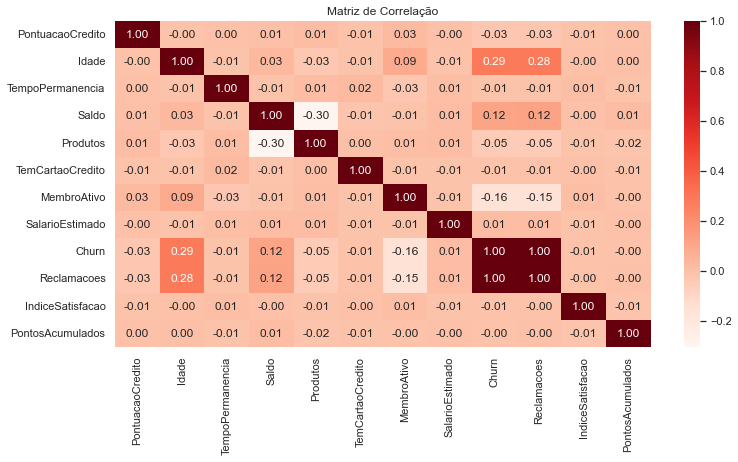

In [85]:
plt.figure(figsize=(12, 6))
correlations = data.corr()
sns.heatmap(correlations,
            cmap="Reds",  # Blues, Reds, Oranges, Greens, Purples, Greys
            annot=True,
            fmt='.2f')
plt.title('Matriz de Correlação')  # Adiciona título ao gráfico
plt.show()

# 4 Tratamento de Dados

Após finalizada a Exploração dos Dados, será definido o tratamento dos dados. Observamos que o conjunto de dados não continha Dados Faltantes, contudo, visualizamos, pelos boxplot, que algumas variáveis contém outliers. Vamos analisar e fazer o devido tratamento dos mesmos.

## 4.1 Detectação de Outliers

Os outliers são valores atípicos, que se afastam significativamente do padrão geral do conjunto de dados. Eles são observações que são extremamente diferentes da maioria das outras amostras e podem ter um impacto desproporcional nas análises estatísticas. Identificar e entender os outliers é crucial em análise de dados, pois eles podem distorcer resultados, prejudicar a precisão dos modelos estatísticos e influenciar decisões errôneas.

Primeiramente vamos procurar identificar os outliers do nosso conjunto de dados, através do boxplot, para após fazer a eliminação de dados que julgamos ser necessário para o andamento de nosso modelo de dados.

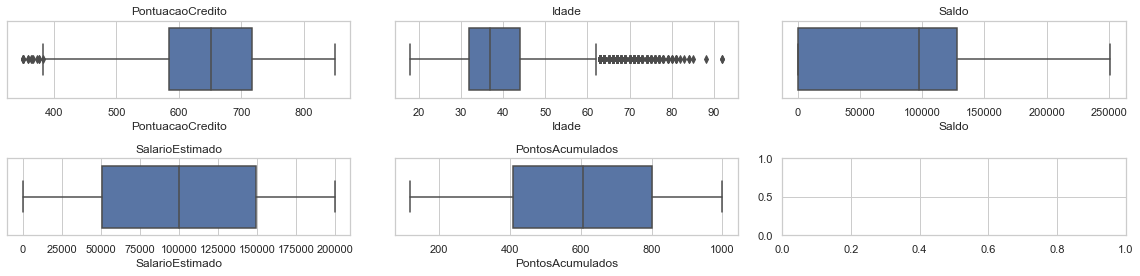

In [88]:
# Definir o número de linhas e colunas
linhas = 2
colunas = 3

# Criar uma figura e eixos para os subplots
fig, axes = plt.subplots(nrows=linhas, ncols=colunas, figsize=(16, 4))

# Lista das variáveis que você deseja plotar
variaveis = ['PontuacaoCredito', 'Idade', 'Saldo', 'SalarioEstimado', 'PontosAcumulados']

# Loop sobre as variáveis e os subplots correspondentes
for i, var in enumerate(variaveis):
    # Box plot para cada variável
    sns.boxplot(ax=axes[i//colunas, i%colunas], x=data[var])
    axes[i//colunas, i%colunas].set_title(var)  # Definir o título do subplot

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

Iremos fazer a detecção e remoção de outliers através da técnica de IQR score (interquartile range). O IQR é o primeiro quartil subtraído do terceiro quartil.

Conforme análise realizada e visualizando dados que possam interferir em nosso modelo, definimos, neste momento, que as variáveis **PONTUAÇÃO CRÉDITO**, **IDADE** e **PONTOS ACUMULADOS** são as que possuem maior interferência nos dados, e, assim sendo, eliminaremos para melhor balancear o nosso modelo.

In [112]:
# Calcular o IQR para as variáveis numéricas
Q1 = data[['PontuacaoCredito', 'Idade', 'PontosAcumulados']].quantile(0.25)
Q3 = data[['PontuacaoCredito', 'Idade', 'PontosAcumulados']].quantile(0.75)
IQR = Q3 - Q1

# Identificar os outliers usando IQR
outliers = ((data[['PontuacaoCredito', 'Idade', 'PontosAcumulados']] < (Q1 - 1.5 * IQR)) |
            (data[['PontuacaoCredito', 'Idade', 'PontosAcumulados']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remover os outliers
data_sem_outliers = data[~outliers]

Iremos novamente exibir a representação gráfica das 3 variáveis tratadas, para identificar o resultado da aplicação.

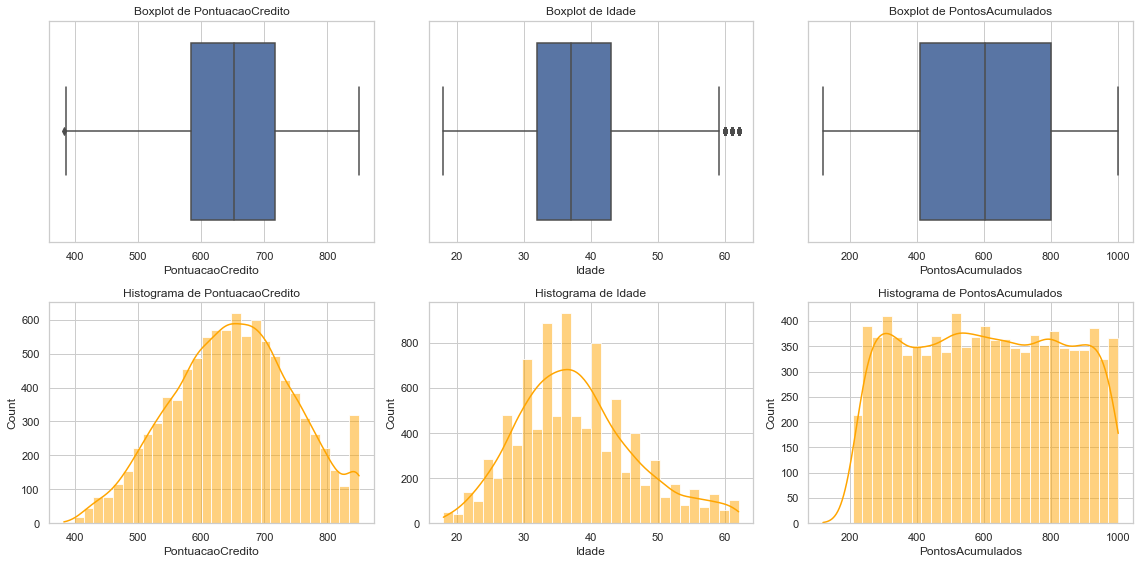

In [114]:
# Definir o número de linhas e colunas
linhas = 2
colunas = 3

# Criar uma figura e eixos para os subplots
fig, axes = plt.subplots(nrows=linhas, ncols=colunas, figsize=(16, 6))

# Lista das variáveis que você deseja plotar
variaveis = ['PontuacaoCredito', 'Idade', 'PontosAcumulados']

# Loop sobre as variáveis e os subplots correspondentes
for i, var in enumerate(variaveis):
    # Box plot para cada variável (linha 1)
    sns.boxplot(ax=axes[0, i], x=data_sem_outliers[var])
    axes[0, i].set_title(f'Boxplot de {var}')  # Definir o título do subplot
    
    # Histograma para cada variável (linha 2)
    sns.histplot(data_sem_outliers[var], bins=30, kde=True, ax=axes[1, i], color='orange')
    axes[1, i].set_title(f'Histograma de {var}')  # Definir o título do subplot

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [121]:
# Filtrar os dados onde 'PontosAcumulados_grupo' está na faixa de 101 a 200
data_filtrado = data_sem_outliers[data_sem_outliers['PontosAcumulados_grupo'] == '101 - 200']

# Exibir os dados filtrados
data_filtrado.head()

,PontuacaoCredito,Localizacao,Genero,Idade,TempoPermanencia,Saldo,Produtos,TemCartaoCredito,MembroAtivo,SalarioEstimado,Churn,Reclamacoes,IndiceSatisfacao,TipoCartao,PontosAcumulados,PontuacaoCredito_grupo,Idade_grupo,Saldo_grupo,Salario_grupo,PontosAcumulados_grupo
12,476,France,Female,34,10,0.00,2,1,0,26260.98,0,0,3,SILVER,119,451 - 500,31 - 40,0 - 24999,20000 - 39999,101 - 200
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163,651 - 700,51 - 60,125000 - 149999,0 - 19999,101 - 200


Foi possível identificar que a variável Pontos Acumulados ainda permanece com dados dos clientes no 1º faixa exibida. Por ser um quantidade insignificante na nossa base de dados, optaremos pela exclusão manual destes dados.

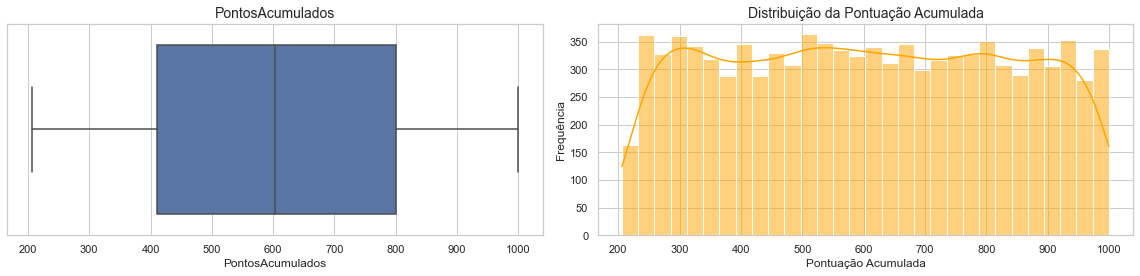

In [137]:
# Filtrar as linhas onde PontosAcumulados_grupo está na faixa de 101 a 200
indices_para_excluir = data_sem_outliers[data_sem_outliers['PontosAcumulados_grupo'] == '101 - 200'].index

# Excluir as linhas do DataFrame
data2 = data_sem_outliers.drop(indices_para_excluir)

## Grafico
# Criando subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

# Box plot 1 (Clientes Churn)
sns.boxplot(ax=axes[0], x='PontosAcumulados', data=data2)
axes[0].set_title('PontosAcumulados', fontsize=14)

# Gráfico de barras para a distribuição original no segundo subplot
sns.histplot(data2['PontosAcumulados'], bins=30, kde=True, ax=axes[1], color='orange')
axes[1].set_xlabel('Pontuação Acumulada')
axes[1].set_ylabel('Frequência')
axes[1].set_title('Distribuição da Pontuação Acumulada', fontsize=14)

plt.tight_layout()
plt.show()